'../../data/planetary_engulfment_test22/' MESA giant star 100R 1M_sun, high floor denstiy and pressure

'../../data/planetary_engulfment_test23/' MESA giant star 100R 1M_sun, middle floor denstiy and pressure

'../../data/planetary_engulfment_test25/' MESA giant star 100R 1M_sun, low floor denstiy and pressure

'../../data/planetary_engulfment_test26/' MESA giant star 100R 1M_sun, low floor denstiy and pressure and high resolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ar
import OrbitAnalysisUtils as ou
import Constants 

from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm.auto import tqdm

#from skimage import measure
import scipy
from scipy.interpolate import RegularGridInterpolator
from scipy.special import expit
from athena_read import athdf

c=Constants.Constants()

%matplotlib inline


Constants defined...


In [2]:
radius = 7.e12
t_dyn_giant = (radius**3/c.G/c.msun)**0.5
base_dir = '../../../work/planetary_engulfment_v1/'
gamma=1.66667
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

reading orbit file for binary simulation...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/athena/vis/python/PEGM_I/OrbitAnalysisUtils.py:47: RuntimeWarning: invalid value encountered in divide
  orb['a21'] = np.array([-F12/m1*orb['x']/orb['sep'],
/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/athena/vis/python/PEGM_I/OrbitAnalysisUtils.py:48: RuntimeWarning: invalid value encountered in divide
  -F12/m1*orb['y']/orb['sep'],
/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/athena/vis/python/PEGM_I/OrbitAnalysisUtils.py:49: RuntimeWarning: invalid value encountered in divide
  -F12/m1*orb['z']/orb['sep']]).T


In [3]:
from scipy import optimize

# EOS(radiation pressure and ideal gas pressure)
# P/rho = 4*c.sigmaSB*x**4/3/c.c/rho+c.kB*x/1.25*2/c.mp

def temp_rad_gas(rho,press):
    f = lambda x, rho,epsilon: 4*c.sigmaSB*x**4/3/c.c/rho+c.kB*x/1.25*2/c.mp-epsilon
    fder = lambda x, rho,epsilon: 16*c.sigmaSB*x**3/3/c.c/rho+c.kB/1.25*2/c.mp
    
    x = 1e3*np.ones_like(rho)
    epsilon = press/rho
    
    return optimize.newton(f, x, fprime=fder, args=(rho,epsilon, ), maxiter=200)

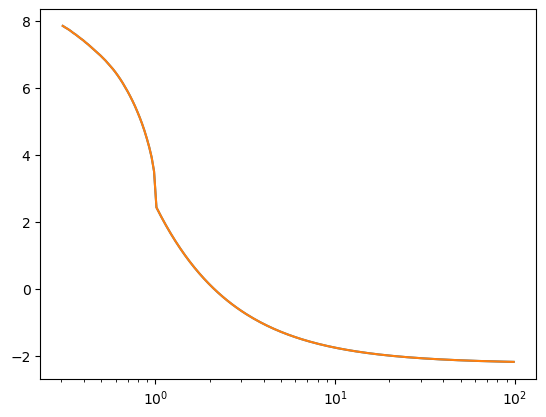

2.3767600059509277


In [6]:
import time
time1=time.time()
base_dir = '../../../work/planetary_engulfment_v1/'

gamma=1.66667


data = athdf(base_dir+'/PEGM.out1.00000.athdf',level=0,subsample=True)


# plt.plot(data['x1v']/radius,np.log10(data['press']/data['rho']*c.mp*1.25/2/c.kB)[96,0,:])

plt.plot(data['x1v']/radius,np.log10((data['press'])[100,48,:]))
base_dir = '../../../../MM-athena-public-version-athena21/data/planetary_engulfment_test39/'

gamma=1.66667


data = athdf(base_dir+'/PEGM.out1.00000.athdf',level=0,subsample=True)


# plt.plot(data['x1v']/radius,np.log10(data['press']/data['rho']*c.mp*1.25/2/c.kB)[96,0,:])

plt.plot(data['x1v']/radius,np.log10((data['press'])[100,48,:]))

plt.xscale('log')
plt.show()
print(time.time()-time1)

In [32]:
base_dir = '../../data/planetary_engulfment_test50/'
data1 = athdf(base_dir+'/PEGM.out1.00072.athdf',level=0,subsample=True)
base_dir = '../../data/planetary_engulfment_test53/'
data2 = athdf(base_dir+'/PEGM.out1.00072.athdf',level=0,subsample=True)
if np.all(data1['rho']-data2['rho']==0):
    print("identical！")

identical！


/tmp/ipykernel_4075647/1148569860.py:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


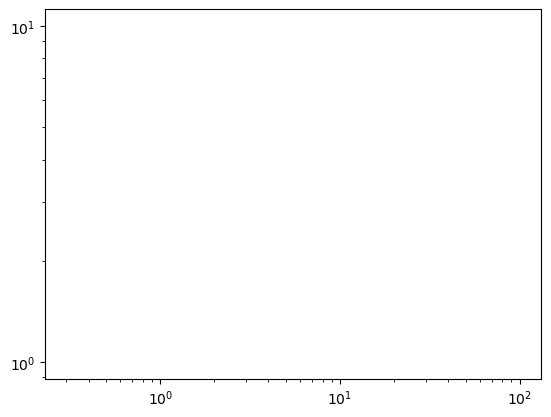

5.567922592163086


In [26]:
import time
time1=time.time()
gamma=1.66667
base_dir = '../../data/planetary_engulfment_test50/'
data1 = athdf(base_dir+'/PEGM.out1.00003.athdf',level=0,subsample=True)

base_dir = '../../data/planetary_engulfment_test53/'
data2 = athdf(base_dir+'/PEGM.out1.00003.athdf',level=0,subsample=True)

base_dir = '../../data/planetary_engulfment_test54/'
data3 = athdf(base_dir+'/PEGM.out1.00003.athdf',level=0,subsample=True)

plt.plot(data['x1v']/radius,((data2['press']/data2['rho']*c.mp*1.25/2/c.kB)[96,0,:]-(data1['press']/data1['rho']*c.mp*1.25/2/c.kB)[96,0,:]))

plt.plot(data['x1v']/radius,((data2['press']/data2['rho']*c.mp*1.25/2/c.kB)[96,0,:]-(data3['press']/data3['rho']*c.mp*1.25/2/c.kB)[96,0,:]))


plt.xscale('log')
plt.yscale('log')
plt.show()
print(time.time()-time1)

In [12]:
((np.arange(9)).reshape(3,3)).reshape(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [23]:
def radialFlux(data):
    temp_1d=np.array((np.array(data['press'],dtype=np.float64)/np.array(data['rho'],dtype=np.float64)*c.mp*1.25/2/c.kB)[100,48,:],dtype=np.float64)
    #temp_1d=temp_rad_gas(data['rho'][100,48,:],data['press'][100,48,:])
    r_1d=data['x1v']
    a=4*c.sigmaSB/c.c
    slopeT=((temp_1d)[1:]-(temp_1d)[:-1])/(r_1d[1:]-r_1d[:-1])
    deltaU=np.array(((temp_1d**4)[1:]-(temp_1d**4)[:-1]),dtype=np.float64)
    slopeU=np.array(((temp_1d**4)[1:]-(temp_1d**4)[:-1])/(r_1d[1:]-r_1d[:-1]),dtype=np.float64)
    
    # F=-c/(3\rho\kappa) slopeU
    rho_1d=data['rho'][100,48,:]
    r0_1d=data['r0'][100,48,:]
    kappa_1d=lc.opac(rho_1d,temp_1d,0.7,0.02)
    flux_1d=[-4*c.sigmaSB/3/rho_1d[i]/kappa_1d[i]*slopeU[i] for i in range(len(slopeU))]
    
    flux_1d_2=[-16/3*c.sigmaSB*temp_1d[i]**3/rho_1d[i]/kappa_1d[i]*slopeT[i] for i in range(len(slopeT))]
    
    #limiter
    R=np.abs(4*slopeT/rho_1d[:-1]/kappa_1d[:-1]/temp_1d[:-1])
    lambdaLim=(2+R)/(6+3*R+R**2)
    #flux_1d_lim=[-16*lambdaLim[i]*c.sigmaSB*temp_1d[i]**3/rho_1d[i]/kappa_1d[i]*slopeT[i] for i in range(len(slopeT))]
    flux_1d_lim=[-4*lambdaLim[i]*c.sigmaSB/rho_1d[i]/kappa_1d[i]*slopeU[i] for i in range(len(slopeU))]
    #flux_1d_lim=np.where(np.array(flux_1d_lim)<0,0,flux_1d_lim)
    return np.array(flux_1d_lim)

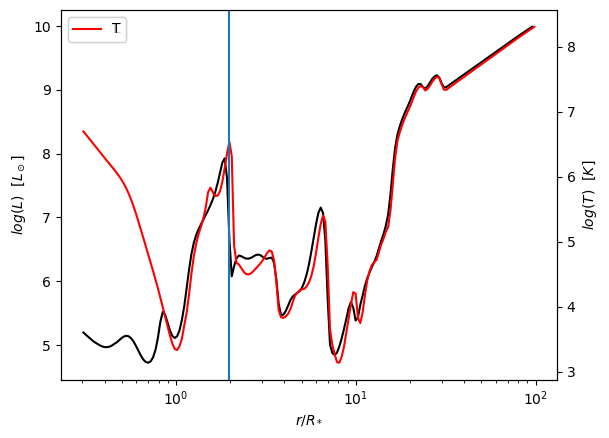

In [33]:
base_dir = '../../data/planetary_engulfment_test50/'
data = athdf(base_dir+'/PEGM.out1.00200.athdf')

fig,ax = plt.subplots()
ax_r=ax.twinx()
ax.plot(data['x1v'][:-1]/radius,np.log10(np.abs(4*np.pi*data['x1v'][:-1]**2*radialFlux(data))/c.lumsun),'k',label='L') #
#plt.plot(data['x1v'][:-1]/radius,np.log10(np.abs(4*np.pi*data['x1v'][:-1]**2*radialFlux(data)[1])/c.lumsun))
#plt.plot(data['x1v'][:-1]/radius,np.log10((radialFlux(data)))) #

#ax_r.plot(data['x1v']/radius,np.log10(data['press']/data['rho']*c.mp*1.25/2/c.kB)[96,48,:],'r',label='T')
ax_r.plot(data['x1v']/radius,np.log10(data['x1v']**2*c.sigmaSB/c.lumsun*((data['press']/data['rho']*c.mp*1.25/2/c.kB)[96,48,:])**4),'r',label='T')

#plt.plot(data['x1v']/radius,data['r0'][100,48,:])
#plt.xlim(0.3,1)
plt.axvline(x=13851759214592.0/radius)
ax.set_xscale('log')
ax.set_xlabel(r'$r/R_*$')
ax.set_ylabel(r'$log(L)\ \ [L_\odot]$')
ax_r.set_ylabel(r'$log(T)\ \ [K]$')
ax.legend()
ax_r.legend()
#plt.yscale('log')
#plt.ylim(36,42)

In [34]:
np.where(data['x1v']==13851759214592.0)

(array([60]),)

In [36]:
print((np.abs(4*np.pi*data['x1v'][:-1]**2*radialFlux(data))/c.lumsun)[61])
print((data['x1v']**2*c.sigmaSB/c.lumsun*((data['press']/data['rho']*c.mp*1.25/2/c.kB)[96,48,:])**4)[61])

1194393.3296787771
2105030.2


In [14]:
data['x1v']
print(np.where(data['x1v'] > 9041500000000.0)[0][0]-np.where(data['x1v'] > 4868500000000.0)[0][0])

161


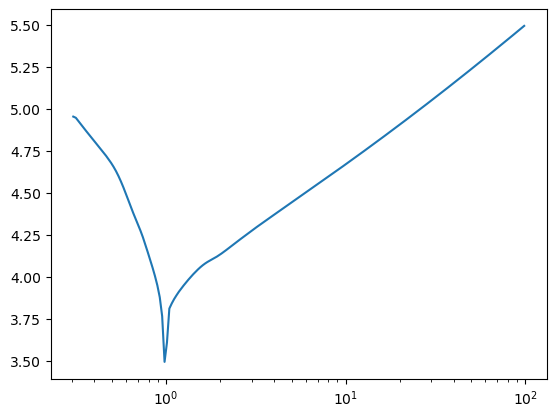

5.053975820541382


In [10]:
import time
time1=time.time()
base_dir = '../../data/planetary_engulfment_test40/'
data = athdf(base_dir+'/PEGM.out1.00019.athdf')
gamma=1.66667

plt.plot(data['x1v']/radius,np.log10(data['press']/data['rho']*c.mp*1.25/2/c.kB)[100,48,:])
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))

#plt.axvline(x=op_radii[31,36]/radius)
plt.xscale('log')
plt.show()
print(time.time()-time1)

In [12]:
data['x1v']
print(np.where(data['x1v'] > 9041500000000.0)[0][0]-np.where(data['x1v'] > 4868500000000.0)[0][0])

20


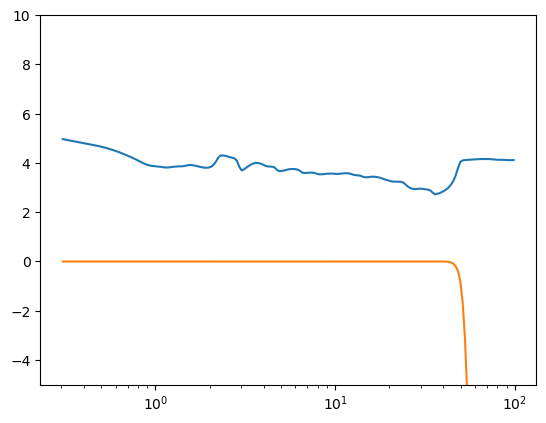

In [44]:
base_dir = '../../data/planetary_engulfment_test39/'
#data = athdf(base_dir+'/PEGM.out1.00040.athdf')
gamma=1.66667
#plt.plot(data['x1v']/radius,np.log10(data['press']/data['rho']*c.mp*1.25/2/c.kB)[100,48,:])
#plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
data = athdf(base_dir+'/PEGM.out1.01000.athdf')
    
plt.plot(data['x1v']/radius,np.log10(data['press']/data['rho']*c.mp*1.25/2/c.kB)[100,48,:])
plt.plot(data['x1v']/radius,np.log10((data['r0'])[100,48,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
#plt.axvline(x=op_radii[31,36]/radius)
plt.xscale('log')
plt.ylim(-5,10)
plt.show()

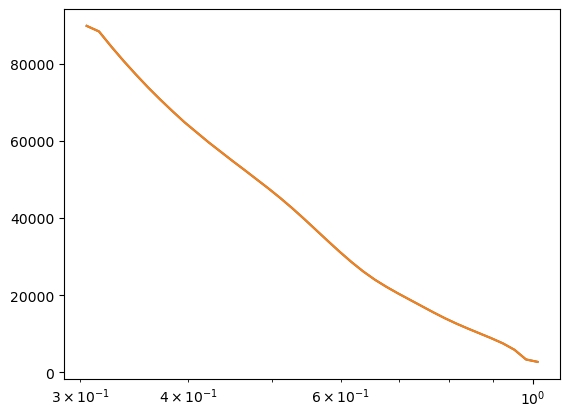

In [55]:
base_dir = '../../data/planetary_engulfment_test39/'
data = athdf(base_dir+'/PEGM.out1.00020.athdf')
gamma=1.66667
r0thresh = 0.6

#temperature = temp_rad_gas(data['rho'],data['press'])
lnT = (np.where(data['r0']>r0thresh,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)),np.nan))[90,48,:]
lnP = (np.where(data['r0']>r0thresh,np.log10((data['press'])),np.nan))[48,36,:]
dlnT = lnT[1:]-lnT[:-1]
dlnP = lnP[1:]-lnP[:-1]
dlnTdlnP = dlnT/dlnP
#plt.plot((data['x1v'][1:]+data['x1v'][:-1])/radius/2,dlnTdlnP)
#plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
#base_dir = '../../data/planetary_engulfment_test40/'
#data = athdf(base_dir+'/PEGM.out1.01000.athdf')
    
plt.plot(data['x1v']/radius,10**(np.where(data['r0']>r0thresh,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)),np.nan))[170,48,:])
#plt.plot(data['x1v']/radius,np.log10((data['rho']*data['r0'])[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))

data = athdf(base_dir+'/PEGM.out1.00020.athdf')
plt.plot(data['x1v']/radius,10**(np.where(data['r0']>r0thresh,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)),np.nan))[170,48,:])


#plt.axhline(y=(gamma-1/gamma),color='k')
plt.xscale('log')
#plt.xlim(0.7,2)
#plt.ylim(2000,20000)
plt.show()

In [31]:
(np.where(data['r0']>r0thresh,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)),np.nan))[90,48,37]

3.5062647

In [49]:
base_dir = '../../data/planetary_engulfment_test39/'
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[31,36,37])

3.5175736

In [79]:
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
gamma=1.66667
temp(data['rho'],data['press'])[31,36,37]

3292.5609059160706

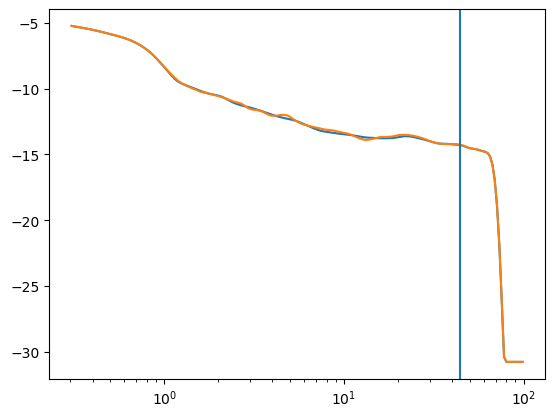

In [44]:
base_dir = '../../data/planetary_engulfment_test38/'
data = athdf(base_dir+'/PEGM.out1.00400.athdf')
gamma=1.66667
plt.plot(data['x1v']/radius,np.log10((data['rho']*data['r0'])[0,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
data = athdf(base_dir+'/PEGM.out1.00400.athdf')
plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[0,-1,:]))
#plt.plot(data['x1v']/radius,np.log10((data['rho']*data['r0'])[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
plt.axvline(x=op_radii[0,0]/radius)
plt.xscale('log')
plt.show()

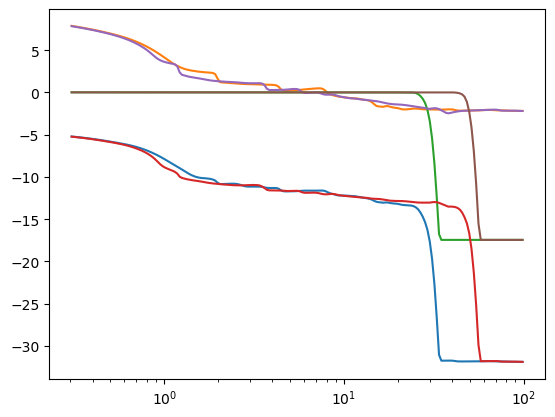

In [50]:
base_dir = '../../data/planetary_engulfment_test39/'
data = athdf(base_dir+'/PEGM.out1.00600.athdf')
gamma=1.66667
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho']*data['r0'])[31,36,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[31,36,:]))
plt.plot(data['x1v']/radius,np.log10((data['r0'])[31,36,:]))
data = athdf(base_dir+'/PEGM.out1.01000.athdf')
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho']*data['r0'])[31,36,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[31,36,:]))
plt.plot(data['x1v']/radius,np.log10((data['r0'])[31,36,:]))
#plt.axvline(x=op_radii[31,36]/radius)
plt.xscale('log')
plt.show()

/tmp/ipykernel_2311976/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


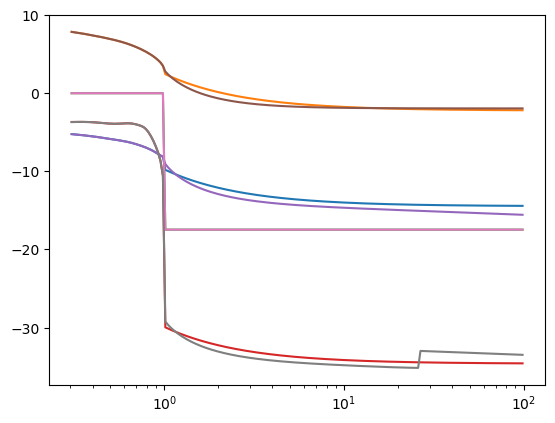

In [45]:
base_dir = '../../data/planetary_engulfment_test39/'
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
gamma=1.66667
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((data['r0'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((opac(data['rho']*data['r0'],data['press']/data['rho']*c.mp*1.25/2/c.kB,0.7,0.02))[154,77,:]))

base_dir = '../../data/planetary_engulfment_test40/'
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((data['r0'])[31,36,:]))
plt.plot(data['x1v']/radius,np.log10((opac(data['rho']*data['r0'],data['press']/data['rho']*c.mp*1.25/2/c.kB,0.7,0.02))[154,77,:]))
#plt.axvline(x=op_radii[154,77]/radius)
plt.xscale('log')
plt.show()

/tmp/ipykernel_2311976/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


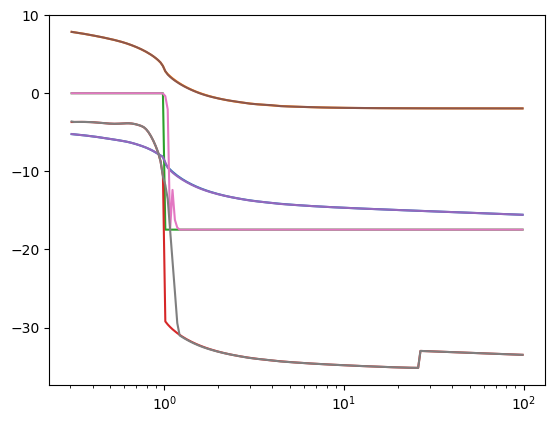

In [39]:
base_dir = '../../data/planetary_engulfment_test40/'
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
gamma=1.66667
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((data['r0'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((opac(data['rho']*data['r0'],data['press']/data['rho']*c.mp*1.25/2/c.kB,0.7,0.02))[154,77,:]))

data = athdf(base_dir+'/PEGM.out1.00036.athdf')
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[154,77,:]))
plt.plot(data['x1v']/radius,np.log10((data['r0'])[31,36,:]))
plt.plot(data['x1v']/radius,np.log10((opac(data['rho']*data['r0'],data['press']/data['rho']*c.mp*1.25/2/c.kB,0.7,0.02))[154,77,:]))
#plt.axvline(x=op_radii[154,77]/radius)
plt.xscale('log')
plt.show()

In [90]:
base_dir = '../../data/planetary_engulfment_test39/'
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
(data['press'])[154,77,-1]

0.006654084

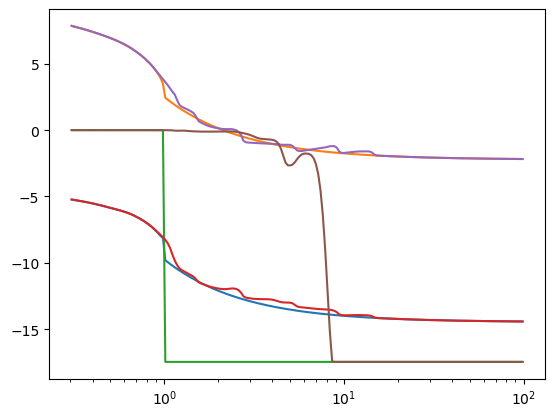

In [107]:
base_dir = '../../data/planetary_engulfment_test39/'
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
gamma=1.66667
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho'])[102,78,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[102,78,:]))
plt.plot(data['x1v']/radius,np.log10((data['r0'])[102,78,:]))
data = athdf(base_dir+'/PEGM.out1.00100.athdf')
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho'])[102,78,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[102,78,:]))
plt.plot(data['x1v']/radius,np.log10((data['r0'])[102,78,:]))
#plt.axvline(x=1)
plt.xscale('log')
plt.show()

In [35]:
data['press'][90,0,170]

303.8652

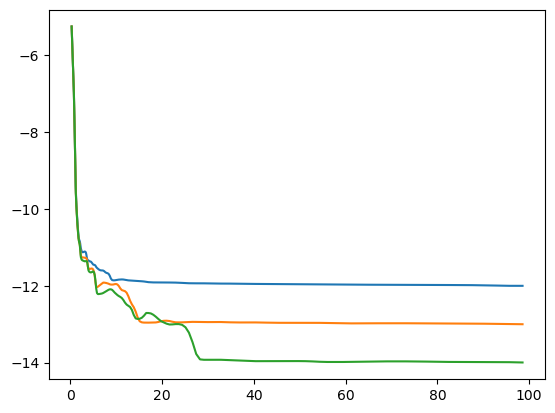

In [25]:
from athena_read import athdf

base_dir = '../../data/planetary_engulfment_test22/'
data = athdf(base_dir+'/PEGM.out1.00600.athdf')

plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
#plt.plot(data['x1v']/c.rsun,np.log10((data['press'])[90,48,:]))
#plt.plot(data['x1v']/c.rsun,np.log10((data['rho']+1e-10)[90,95,:]))

#plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,90,:]))
base_dir = '../../data/planetary_engulfment_test23/'
data = athdf(base_dir+'/PEGM.out1.00600.athdf')
gamma=1.66667
plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))

base_dir = '../../data/planetary_engulfment_test25/'
data = athdf(base_dir+'/PEGM.out1.00600.athdf')
gamma=1.66667
plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))

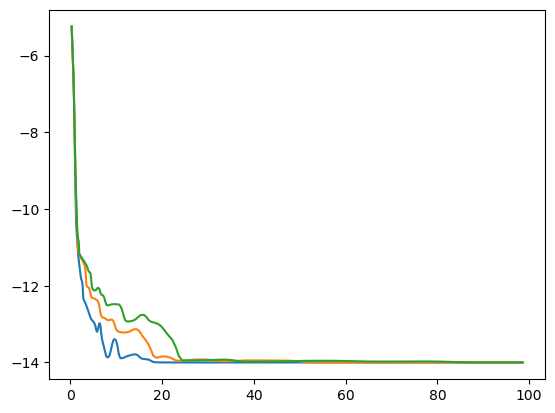

In [26]:
from athena_read import athdf

base_dir = '../../data/planetary_engulfment_test25/'
data = athdf(base_dir+'/PEGM.out1.00100.athdf')
plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
data = athdf(base_dir+'/PEGM.out1.00300.athdf')
plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
data = athdf(base_dir+'/PEGM.out1.00500.athdf')
plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))

reading orbit file for binary simulation...


<function matplotlib.pyplot.show(close=None, block=None)>

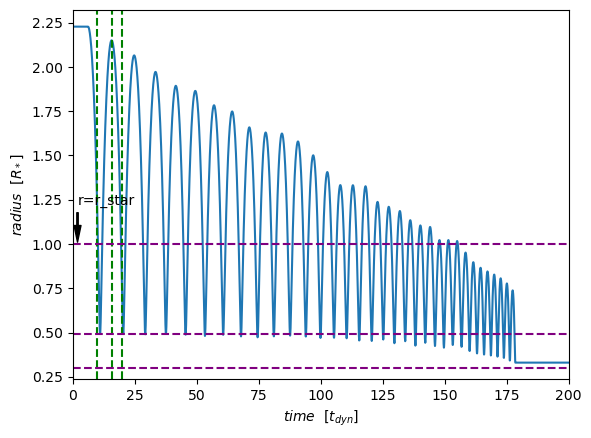

In [37]:
base_dir = '../../data/planetary_engulfment_test39/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

radius = 7.e12
#radius =  8.42e10


#plot the orbit 
plt.plot(orb['time']/t_dyn_giant,orb['sep']/radius)
#plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
plt.axvline(x=(orb['time']/t_dyn_giant)[index_10], color='g', linestyle='--')
plt.axvline(x=(orb['time']/t_dyn_giant)[index_max], color='g', linestyle='--')
plt.axvline(x=(orb['time']/t_dyn_giant)[index_20], color='g', linestyle='--')

plt.axhline(y=1, color='purple', linestyle='--')
plt.axhline(y=0.3, color='purple', linestyle='--')
plt.axhline(y=r_peri, color='purple', linestyle='--')
plt.annotate('r=r_star', xy=(2, 1), xytext=(2, 1.22),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

plt.ylabel('$radius \ \ [R_*]$')
plt.xlabel('$time \ \ [t_{dyn}]$')
plt.xlim(0,200)

plt.show

In [34]:
index=0
while (orb['time']/t_dyn_giant)[index]<10:
    index+=1
index_10=index
while (orb['time']/t_dyn_giant)[index]<20:
    index+=1
index_20=index

In [8]:
r_peri=np.min((orb['sep']/radius)[index_5:index_15])


In [23]:
index_min=np.where((orb['sep']/radius)==r_peri)[0][0]
x_peri=orb['x'][index_min]
y_peri=orb['y'][index_min]
z_peri=orb['z'][index_min]
v_peri=orb['vmag'][index_min]

In [26]:
print(x_peri)
print(y_peri)
print(z_peri)
print(v_peri)

-3331555000000.0
887170100000.0
0.001275073
7794373.615662262


In [30]:
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
index=0
while (data['x1f'])[index]<r_peri:
    index+=1
index_dep=index-1

cs_dep=(data['press']/data['rho']*gamma)[0,0,index_dep]
R_a=c.G*c.Mj*2/(v_peri**2+cs_dep**2)
r_dep=max(R_a,c.Rj)
print(R_a)
print(r_dep)

0.030309045492572774
7149200000.0


In [38]:
r_apo=np.max((orb['sep']/radius)[index_10:index_20])
index_max=np.where((orb['sep']/radius)==r_apo)[0][0]
delta_E=c.G*c.msun*5*c.Mj*(1/2/orb['sep'][0]-1/2/orb['sep'][index_max])
print(delta_E)

-2.9143644302143325e+41


In [13]:
-2.9143644302143325e+41*5

-1.4571822151071664e+42

In [13]:
print(r_peri*radius)

3447655653391.0127


In [14]:
orb

<Table length=5000>
ncycle     time    ...                      a12                     
int64    float64   ...                   float64[3]                 
------ ----------- ... ---------------------------------------------
     0         0.0 ...                    -5346318.465084389 .. -0.0
    46    101304.1 ...                    -5346318.465084389 .. -0.0
    88    201899.7 ...                    -5346318.465084389 .. -0.0
   129    300157.1 ...                    -5346318.465084389 .. -0.0
   171    400838.4 ...                    -5346318.465084389 .. -0.0
   213    501559.4 ...                    -5346318.465084389 .. -0.0
   255    602322.1 ...                    -5346318.465084389 .. -0.0
   296    700723.4 ...                    -5346318.465084389 .. -0.0
   338    801562.9 ...                    -5346318.465084389 .. -0.0
   379    900038.3 ...                    -5346318.465084389 .. -0.0
   ...         ... ...                                           ...
216275 499001200.0 ... -203119331.93524715 .. -9.635257752950728e-05
216320 499102000.0 ... -203119331.93524715 .. -9.635257752950728e-05
216364 499200500.0 ... -203119331.93524715 .. -9.635257752950728e-05
216409 499301200.0 ... -203119331.93524715 .. -9.635257752950728e-05
216454 499401900.0 ... -203119331.93524715 .. -9.635257752950728e-05
216498 499500400.0 ... -203119331.93524715 .. -9.635257752950728e-05
216543 499601100.0 ... -203119331.93524715 .. -9.635257752950728e-05
216588 499701900.0 ... -203119331.93524715 .. -9.635257752950728e-05
216632 499800400.0 ... -203119331.93524715 .. -9.635257752950728e-05
216677 499901100.0 ... -203119331.93524715 .. -9.635257752950728e-05

In [3]:
import matplotlib as mpl

mpl.rcParams.update({

    # Use LaTeX to write all text
    #"text.usetex": True,
    #"font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    # Non-italic math
    "mathtext.default": "regular",
    # Tick settings
    "xtick.direction" : "in",
    "ytick.direction" : "in",
    "xtick.top" : True,
    "ytick.right" : True,
    # Short dash sign
    "axes.unicode_minus" : True
})

#mpl.rcParams['figure.dpi'] = 300
#mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline


reading orbit file for binary simulation...
tperi =  17800070.0
read_data...reading file ../../data/planetary_engulfment_test53/PEGM.out1.00020.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test53/PEGM.out1.00035.athdf


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test53/PEGM.out1.00042.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test53/PEGM.out1.00059.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test53/PEGM.out1.00020.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test53/PEGM.out1.00035.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test53/PEGM.out1.00042.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_tes

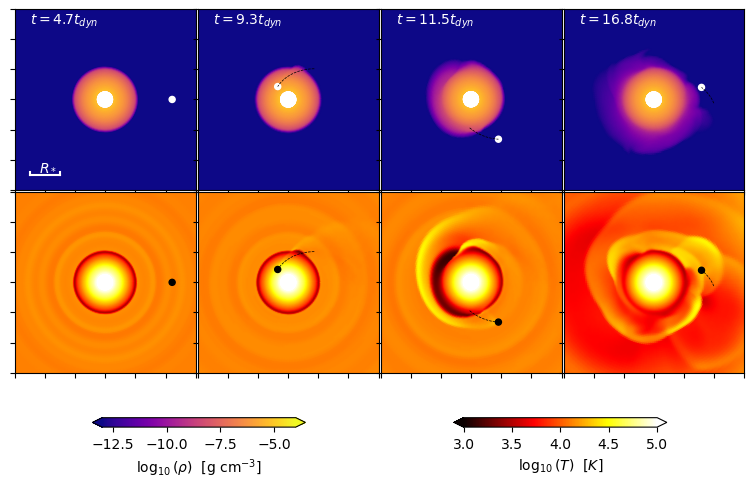

In [13]:
base_dir = '../../data/planetary_engulfment_test53/'
fig_mm = 1/25.4 #figure size
Porb = 2e6   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1."+"00020"+".athdf",
            base_dir + "PEGM.out1."+"00035"+".athdf",
            base_dir + "PEGM.out1."+"00042"+".athdf",
            base_dir + "PEGM.out1."+"00059"+".athdf"
           ]
'''
start_id = 20
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*16+start_id).zfill(5)+".athdf"
    filelist.append(datafile)
'''

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4])


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

cbar_ax1 = fig.add_axes([0.285, -0.005, 0.2, 0.02])
cbar_ax2 = fig.add_axes([0.54, -0.005, 0.2, 0.02])    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='plasma',vmin=-13,vmax=-4,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb1=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]', location='bottom',cax=cbar_ax1)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb1.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='white')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])
    
    if i ==0:
        grid[i].plot([-2.5,-1.5],[-2.5,-2.5],'w')
        grid[i].plot([-2.5,-2.5],[-2.5,-2.4],'w')
        grid[i].plot([-1.5,-1.5],[-2.5,-2.4],'w')
        grid[i].text(-2.2, -2.2,r'$R_*$',color='w', va='center', ha='left')
    
for i,myfile in enumerate(filelist):
    i+=4
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### temperature
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['press']/d['rho']*c.mp*1.25/2/c.kB)[:,thind,:]),np.nan ) ),
               cmap='hot',vmin=3,vmax=5,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb2=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( T \right)$  $[K]$', location='bottom',cax=cbar_ax2)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb2.solids.set_edgecolor('face')
    
    #grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='k')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.1,color='k') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])

plt.savefig('PEGMfig/dens_temp.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...
tperi =  85800860.0
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00020.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00035.athdf


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00042.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00059.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00020.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00035.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00042.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_tes

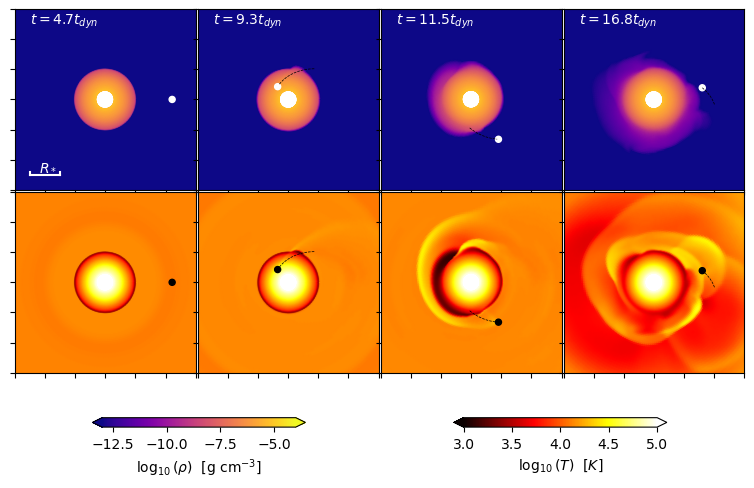

In [15]:
base_dir = '../../data/planetary_engulfment_test39/'
fig_mm = 1/25.4 #figure size
Porb = 2e6   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1."+"00020"+".athdf",
            base_dir + "PEGM.out1."+"00035"+".athdf",
            base_dir + "PEGM.out1."+"00042"+".athdf",
            base_dir + "PEGM.out1."+"00059"+".athdf"
           ]
'''
start_id = 20
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*16+start_id).zfill(5)+".athdf"
    filelist.append(datafile)
'''

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4])


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

cbar_ax1 = fig.add_axes([0.285, -0.005, 0.2, 0.02])
cbar_ax2 = fig.add_axes([0.54, -0.005, 0.2, 0.02])    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='plasma',vmin=-13,vmax=-4,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb1=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]', location='bottom',cax=cbar_ax1)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb1.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='white')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])
    
    if i ==0:
        grid[i].plot([-2.5,-1.5],[-2.5,-2.5],'w')
        grid[i].plot([-2.5,-2.5],[-2.5,-2.4],'w')
        grid[i].plot([-1.5,-1.5],[-2.5,-2.4],'w')
        grid[i].text(-2.2, -2.2,r'$R_*$',color='w', va='center', ha='left')
    
for i,myfile in enumerate(filelist):
    i+=4
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### temperature
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['press']/d['rho']*c.mp*1.25/2/c.kB)[:,thind,:]),np.nan ) ),
               cmap='hot',vmin=3,vmax=5,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb2=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( T \right)$  $[K]$', location='bottom',cax=cbar_ax2)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb2.solids.set_edgecolor('face')
    
    #grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='k')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.1,color='k') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])

plt.savefig('PEGMfig/dens_temp.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...
tperi =  59402330.0


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:51: RuntimeWarning: invalid value encountered in divide
  orb['a12'] = np.array([F12/m2*orb['x']/orb['sep'],
/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:52: RuntimeWarning: invalid value encountered in divide
  F12/m2*orb['y']/orb['sep'],
/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:53: RuntimeWarning: invalid value encountered in divide
  F12/m2*orb['z']/orb['sep']]).T


read_data...reading file ../../data/planetary_engulfment_test51/PEGM.out1.00021.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test51/PEGM.out1.00200.athdf


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test51/PEGM.out1.00400.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test51/PEGM.out1.00600.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test51/PEGM.out1.00021.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test51/PEGM.out1.00200.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test51/PEGM.out1.00400.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_tes

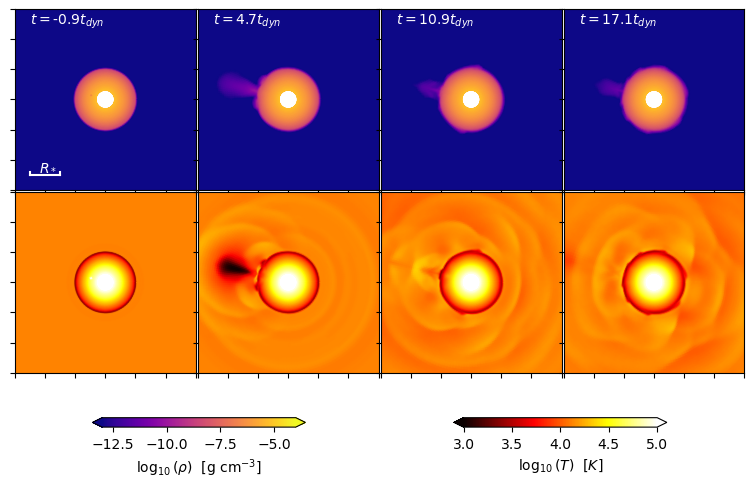

In [9]:
base_dir = '../../data/planetary_engulfment_test51/'
fig_mm = 1/25.4 #figure size
Porb = 2e6   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1."+"00021"+".athdf",
            base_dir + "PEGM.out1."+"00200"+".athdf",
            base_dir + "PEGM.out1."+"00400"+".athdf",
            base_dir + "PEGM.out1."+"00600"+".athdf"
           ]
'''
start_id = 20
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*16+start_id).zfill(5)+".athdf"
    filelist.append(datafile)
'''

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4])


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

cbar_ax1 = fig.add_axes([0.285, -0.005, 0.2, 0.02])
cbar_ax2 = fig.add_axes([0.54, -0.005, 0.2, 0.02])    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='plasma',vmin=-13,vmax=-4,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb1=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]', location='bottom',cax=cbar_ax1)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb1.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='white')
    
   # grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    #sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    #l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])
    
    if i ==0:
        grid[i].plot([-2.5,-1.5],[-2.5,-2.5],'w')
        grid[i].plot([-2.5,-2.5],[-2.5,-2.4],'w')
        grid[i].plot([-1.5,-1.5],[-2.5,-2.4],'w')
        grid[i].text(-2.2, -2.2,r'$R_*$',color='w', va='center', ha='left')
    
for i,myfile in enumerate(filelist):
    i+=4
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### temperature
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['press']/d['rho']*c.mp*1.25/2/c.kB)[:,thind,:]),np.nan ) ),
               cmap='hot',vmin=3,vmax=5,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb2=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( T \right)$  $[K]$', location='bottom',cax=cbar_ax2)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb2.solids.set_edgecolor('face')
    
    #grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='k')
    
   # grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.1,color='k') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    #sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    #l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])

#plt.savefig('PEGMfig/dens_temp.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...
tperi =  85500800.0
read_data...reading file ../../data/planetary_engulfment_test48/PEGM.out1.00036.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test48/PEGM.out1.00040.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test48/PEGM.out1.00200.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test48/PEGM.out1.00207.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test48/PEGM.out1.00036.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test48/PEGM.out1.00040.a

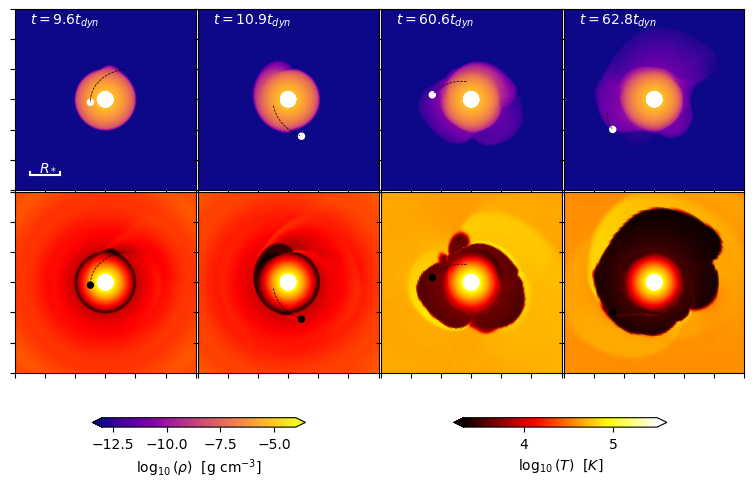

In [11]:
base_dir = '../../data/planetary_engulfment_test48/'
fig_mm = 1/25.4 #figure size
Porb = 2e6   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1."+"00036"+".athdf",
            base_dir + "PEGM.out1."+"00040"+".athdf",
            base_dir + "PEGM.out1."+"00200"+".athdf",
            base_dir + "PEGM.out1."+"00207"+".athdf"
           ]
'''
start_id = 20
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*16+start_id).zfill(5)+".athdf"
    filelist.append(datafile)
'''

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4])


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

cbar_ax1 = fig.add_axes([0.285, -0.005, 0.2, 0.02])
cbar_ax2 = fig.add_axes([0.54, -0.005, 0.2, 0.02])    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='plasma',vmin=-13,vmax=-4,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb1=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]', location='bottom',cax=cbar_ax1)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb1.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='white')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])
    
    if i ==0:
        grid[i].plot([-2.5,-1.5],[-2.5,-2.5],'w')
        grid[i].plot([-2.5,-2.5],[-2.5,-2.4],'w')
        grid[i].plot([-1.5,-1.5],[-2.5,-2.4],'w')
        grid[i].text(-2.2, -2.2,r'$R_*$',color='w', va='center', ha='left')
    
for i,myfile in enumerate(filelist):
    i+=4
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### temperature
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['press']/d['rho']*c.mp*1.25/2/c.kB)[:,thind,:]),np.nan ) ),
               cmap='hot',shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb2=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( T \right)$  $[K]$', location='bottom',cax=cbar_ax2)
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb2.solids.set_edgecolor('face')
    
    #grid[i].annotate(r"$t=$"+str(round((d['Time'])/t_dyn_giant-np.pi/2,1))+r"$t_{dyn}$", (-2.5,2.5),color='k')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.1,color='k') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 3
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    #grid[i].set_xlabel('$x \ \ [R_\odot]$')
    #grid[i].set_ylabel('$y \ \ [R_\odot]$')
    grid[i].set_xticks([-3,-2,-1,0,1,2,3], ["", "", "", "", "", "", ""])
    grid[i].set_yticks([-3,-2,-1,0,1,2,3], ["", "", "", "","", "", ""])

#plt.savefig('PEGMfig/dens_temp.pdf', format='pdf', bbox_inches='tight')

reading orbit file for binary simulation...
tperi =  85800860.0
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00036.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00040.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00300.athdf


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00800.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


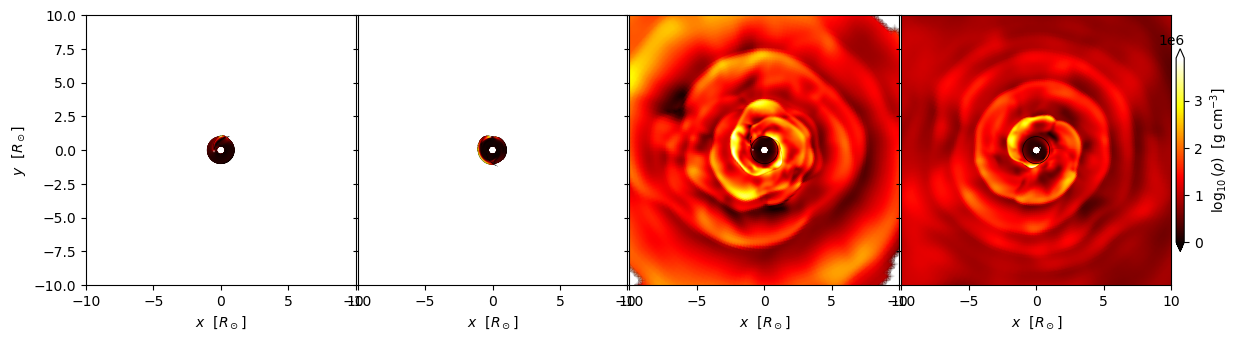

In [3]:
base_dir = '../../data/planetary_engulfment_test39/'
fig_mm = 1/25.4 #figure size
Porb = 2e6   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = [base_dir + "PEGM.out1."+"00036"+".athdf",
            base_dir + "PEGM.out1."+"00040"+".athdf",
            base_dir + "PEGM.out1."+"00300"+".athdf",
            base_dir + "PEGM.out1."+"00800"+".athdf"
           ]
thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[1,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.9

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    vel = ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10(((d['vel1']**2+d['vel2']**2+d['vel3']**2)**0.5)[:,thind,:]),np.nan ) )
    vel = ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, (((d['vel1']**2+d['vel2']**2+d['vel3']**2)**0.5)[:,thind,:]),np.nan ) )
    cs = ou.get_plot_array_midplane(np.log10((((d['press']/d['rho']*gamma)**0.5)[:,thind,:])) )
    #cs = 1/2*(np.log10(c.kB)+np.log10(temp))
    mach = vel-cs
    mach_thresh = np.max(mach)
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/radius, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/radius,
                           vel,
               cmap='hot',vmin =-1, shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
   # grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/radius,(y2-rcom[1])/radius],radius=0.01,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    lens = 10
    grid[i].set_ylim(-lens,lens)
    grid[i].set_xlim(-lens,lens)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/radius,(orb[sel]['y']-orb[sel]['ycom'])/radius,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    
    import matplotlib.patches as patches
    
    if i==2 or i ==3:
        #circle = patches.Circle((0, 0), radius=1, edgecolor='k', facecolor='none', linewidth=0.5)
        grid[i].add_patch(plt.Circle([0,0],radius=1,edgecolor='k', linewidth=0.5, facecolor='none'))
    


In [15]:
1000*5e5/t_dyn_giant

311.0523143685841

reading orbit file for binary simulation...
tperi =  85800860.0
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00020.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00036.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00052.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00068.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00084.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test39/PEGM.out1.00100.a

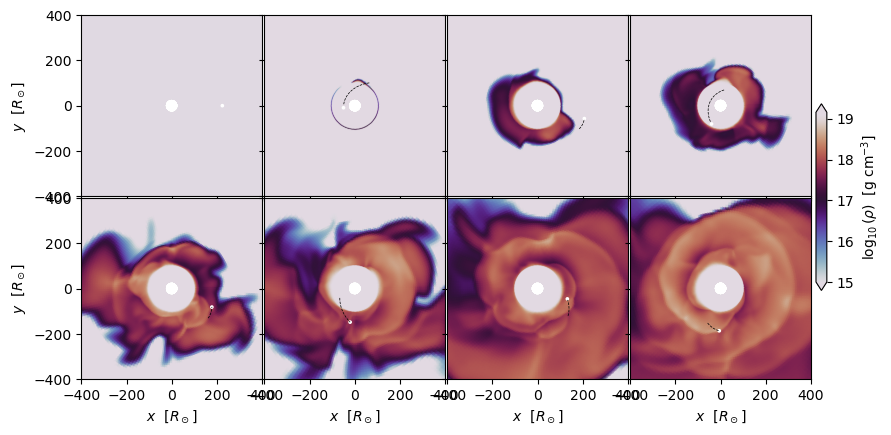

In [12]:
base_dir = '../../data/planetary_engulfment_test39/'
fig_mm = 1/25.4 #figure size
Porb = 2e6   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = []
start_id = 20
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*16+start_id).zfill(5)+".athdf"
    filelist.append(datafile)

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    if i==0:
        rho0=ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ))
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/c.rsun, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/c.rsun,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) )-rho0,
               cmap='twilight',vmin=15,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
   # grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=5,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    rlim = 400
    grid[i].set_ylim(-rlim,rlim)
    grid[i].set_xlim(-rlim,rlim)
    sel = (orb['time']>d['Time']-Porb/1) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


In [9]:
ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) )-rho0

array([[-0.00852489, -0.00074959, -0.00425482, ..., -0.00122833,
        -0.00149536, -0.00222969],
       [-0.00851774, -0.0007391 , -0.00425673, ..., -0.00126266,
        -0.00152969, -0.00226974],
       [-0.00850296, -0.00072289, -0.00425339, ..., -0.001297  ,
        -0.00156403, -0.0023098 ],
       ...,
       [-0.00851107, -0.00074863, -0.00423002, ..., -0.00115395,
        -0.00142097, -0.00214577],
       [-0.00852251, -0.00075293, -0.00424528, ..., -0.00119209,
        -0.00145912, -0.00218773],
       [-0.00852489, -0.00074959, -0.00425482, ..., -0.00122833,
        -0.00149536, -0.00222969]], dtype=float32)

read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00010.athdf
 ...file read, constructing arrays
 ...gamma= 1.6666666666666667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00110.athdf
 ...file read, 

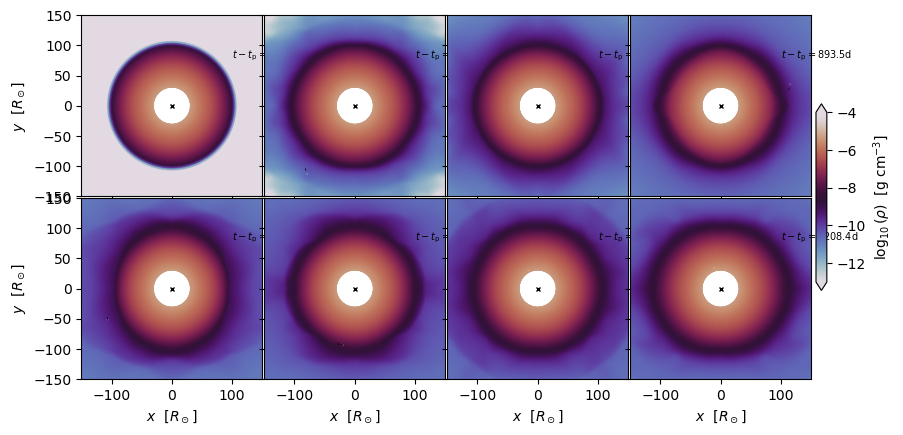

In [21]:
thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.0

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,get_cartesian= True,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    xx,zz,rho = ou.get_plot_array_vertical('rho',np.pi,myfile,base_dir+'polytrope.dat',orb,m1=0,m2=0)
    xx,zz,r0 = ou.get_plot_array_vertical('r0',np.pi,myfile,base_dir+'polytrope.dat',orb,m1=0,m2=0)
    im=grid[i].pcolormesh(xx/c.rsun, zz/c.rsun, np.where(r0>r0thresh,np.log10(rho*r0),np.nan),
               cmap='twilight',vmin=-13,vmax=-4,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t-t_{\rm p}=$"+str(round((d['Time']-tperi)/86400.,1))+"d", (100,80),fontsize=7)
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    grid[i].set_ylim(-150,150)
    grid[i].set_xlim(-150,150)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/c.rsun,(orb[sel]['y']-orb[sel]['ycom'])/c.rsun,'k--',lw=0.5)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
    grid[i].plot([0],[0],'kx',markersize=3)
    #add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    

In [6]:
# plot unbounded mass by Bernoulli constant
def find_r(file, r_given):
    r_given_filelike = r_given*np.ones_like(file)
    r_index = np.argmin(np.abs(file-r_given_filelike))
    return r_index

def m_dot_parallel(i,myfile,phi_interp,gamma,rclist,m_dot_time,time):
    d = athdf(myfile)
    print(myfile+" file readed...")
    time[i] = d["Time"]
    
    v_abs = np.sqrt(d['vel1']**2+d['vel2']**2+d['vel3']**2)
    phi_r = phi_interp(d['x1v'])
    B = d['rho']*d['r0']*v_abs**2/2+d['rho']*d['r0']*phi_r+d['press']*(1+1/(gamma-1))
    
    ### caluculate the M_dot at rc
    for j,rc in enumerate(rclist):
        rc_index = find_r(d['x1v'],rc)
        d_theta = np.pi/d['rho'].shape[1]
        d_phi = 2*np.pi/d['rho'].shape[0]
        M_dot_tp = np.where(d['vel1'][:,:,rc_index]>0,(d['rho']*d['r0']*d['vel1'])[:,:,rc_index],0)
        M_dot_tp = np.where(B[:,:,rc_index]>=0,M_dot_tp,0)
        M_dot_tp = np.dot(M_dot_tp,np.sin(d['x2v']))
        M_dot = np.sum(M_dot_tp)*rc**2*d_theta*d_phi
        
        m_dot_time_i = m_dot_time[i]
        m_dot_time_i[j] = M_dot
        m_dot_time[i] = m_dot_time_i
        
base_dir = '../../data/planetary_engulfment_test26/'
r_phi = np.loadtxt(base_dir+"potential.dat")
phi_interp = scipy.interpolate.interp1d(r_phi[:,0],r_phi[:,1])


filelist = []
start_id = 0
id_int = 10
for id_name in range(int(1000/id_int)):
    datafile = base_dir + "PEGM.out1."+str(id_name*id_int+start_id).zfill(5)+".athdf"
    filelist.append(datafile)


n_file = len(filelist)
gamma=1.66667
rclist = radius*np.linspace(1.0,3.0,num=5)

"""
    Use multiprocessing.Process to parallel execution
"""
from multiprocessing import Pool,Array,Process,Manager
    
     
p_list = []
manager = Manager()
m_dot_time = manager.list(np.zeros((n_file,5),dtype=np.float64))
time = manager.list(np.zeros((n_file,),dtype=np.float64))
     
pool = Pool(20)
for i,myfile in enumerate(filelist):
    pool.apply_async(m_dot_parallel, args=(i,myfile,phi_interp,gamma,rclist,m_dot_time,time))
    
pool.close()
pool.join()
    
print("done!")

../../data/planetary_engulfment_test22/PEGM.out1.00080.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00150.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00010.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00120.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00140.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00160.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00100.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00050.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00070.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00020.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00030.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00110.athdf file readed...
../../data/planetary_engulfment_test22/PEGM.out1.00190.athdf file readed...
../../data/p

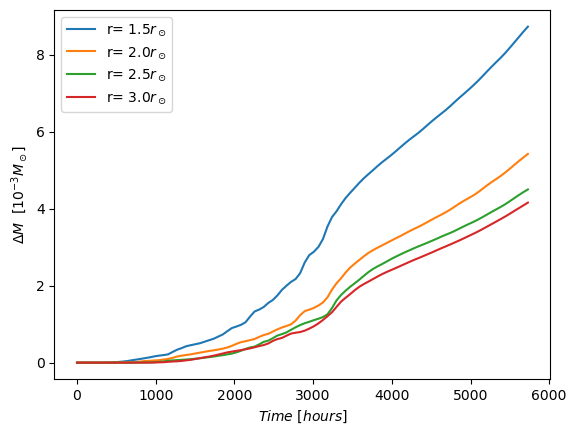

In [11]:
# calculate the cumulated mass loss
time_post = np.array(time)
m_dot_time_post = np.array(m_dot_time)

n_time = np.shape(m_dot_time_post)[0]
n_line = np.shape(m_dot_time_post)[1]
delta_M = np.zeros((n_time,n_line))
for i in range(n_time-1):
    delta_M[i+1,:] = delta_M[i,:]+(m_dot_time_post[i,:]+m_dot_time_post[i+1,:])/2*(time[i+1]-time[i])
    
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time_post/3600/24,delta_M[:,i]/c.msun*10**3,label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\Delta M \ \ [10^{-3} M_\odot]$')
ax.legend()

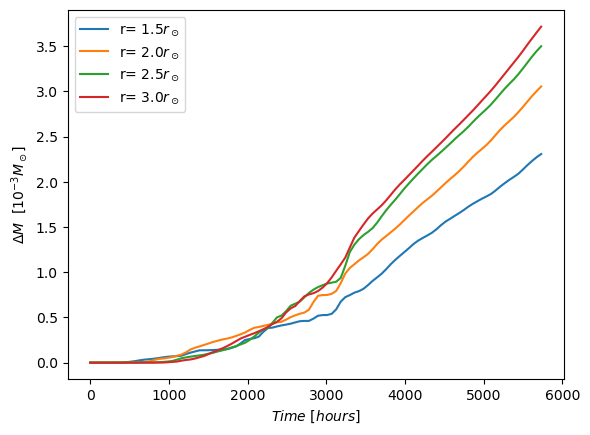

In [13]:
# calculate the cumulated mass loss
time_post = np.array(time)
m_dot_time_post = np.array(m_dot_time)

n_time = np.shape(m_dot_time_post)[0]
n_line = np.shape(m_dot_time_post)[1]
delta_M = np.zeros((n_time,n_line))
for i in range(n_time-1):
    delta_M[i+1,:] = delta_M[i,:]+(m_dot_time_post[i,:]+m_dot_time_post[i+1,:])/2*(time[i+1]-time[i])
    
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time_post/3600/24,delta_M[:,i]/c.msun*10**3,label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\Delta M \ \ [10^{-3} M_\odot]$')
ax.legend()

In [4]:
def get_interp_function(d,var,rescale_factor=1,method='linear'):
    """
    MM: Use RegularGridInterpolator to pass data to interpolating function for a given variable
    Parameters
    -----------
    d : dict
       athena data dict from read_data
    var: str
       name of variable to be interpolated
       
    Returns
    --------
    var_interp: an interpolating function that can be called with a tuple (phi,theta,r)
    """
    dph = np.gradient(d['x3v'])[0]
    dtheta = np.gradient(d['x2v'])[0]
    two_pi = ( (d['x3v'][-1]-d['x3v'][0]+dph) /(2*np.pi) > 0.99 ) # boolean to determine if spans 2pi in phi
    x1v = d['x1v']*rescale_factor
    var_shape = d[var].shape
    
    if two_pi:
        x3v = np.append(d['x3v'][0]-dph,d['x3v'])
        x3v = np.append(x3v,x3v[-1]+dph)
        var_data = np.append([d[var][-1]],d[var],axis=0)
        var_data = np.append(var_data,[var_data[0]],axis=0)
        var_shape = var_data.shape
    else:
        x3v = d['x3v']
        var_data = d[var]
        
    # extend in theta
    x2v = np.append(d['x2v'][0]-dtheta,d['x2v'])
    x2v = np.append(x2v,x2v[-1]+dtheta)
    var_data = np.append(var_data[:,0,:].reshape(var_shape[0],1,var_shape[2]),var_data,axis=1)
    var_data = np.append(var_data,var_data[:,-1,:].reshape(var_shape[0],1,var_shape[2]),axis=1)
        
    var_interp = RegularGridInterpolator((x3v,x2v,x1v),var_data,bounds_error=False,method=method)
    return var_interp

def cart_to_polar(x,y,z):
    """cartesian->polar conversion (matches 0<phi<2pi convention of Athena++)
    Parameters
    x, y, z
    Returns
    r, th, phi
    """
    r = np.sqrt(x**2 + y**2 +z**2)
    th = np.arccos(z/r)
    phi = np.arctan2(y,x)
    phi = np.where(phi>=0,phi,phi+2*np.pi)
    return np.stack((r, th, phi), axis=2)

def mesh_interpolate_at_xyzpoints(d,var,points):
    """
    MM: convience function to interpolate a variable to mesh points
    Parameters
    -----------
    d: athena++ data dict
    var: str variable name in, e.g. "rho"
    points: array of cartesian positions (eg vertices or centroids) (n,n,3) floats (x,y,z)
    """
    var_interp = get_interp_function(d,var)
    rp,thp,php = cart_to_polar(points[:,:,0],points[:,:,1],points[:,:,2])
    return var_interp( (php,thp,rp) )


In [33]:
### integrate along radius from every solid angle
mylevel = None

# considering Hydrogen and ff opacity
def ff_opacity(rho, temp, wavelength):
    # in cgs unit
    opacity = 4.97*rho**2/temp**0.5*wavelength**3*1000
    return opacity

def Rosseland_mean_opacity(rho,temp):
    # in cgs unit
    opacity = 8e22*temp**(-7/2)*rho**2
    return opacity

def opac(rho,temp,X,Z):
    # in cgs units
    # molecules
    kappa_m = 0.1*Z
    
    # negative hydrogen ion
    kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
    
    # electron scattering
    kappa_e = 0.2*(1+X)/(1+2.7e11*rho/temp**2)/(1+(temp/4.5e8)**0.86)
    
    # Kramers formula
    kappa_K = 4e25*(1+X)*(Z+0.001)*rho/temp**3.5
    
    opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
    
    return opacity

def observer_grid(n, box_half_length = 1.0865e11, method = 'uniform',direction ='z'):
    #n*n*3 rectangle gird
    
    if method == 'uniform':
        obs_grid_xx = box_half_length*np.ones((n,n))
        pos_yy = np.linspace(-box_half_length, box_half_length, n)
        pos_zz = pos_yy
        obs_grid_yy,obs_grid_zz = np.meshgrid(pos_yy, pos_zz)
        
        if direction == 'x':
            obs_grid = np.stack((obs_grid_xx, obs_grid_yy, obs_grid_zz), axis=2)
            
        if direction == 'z':
            obs_grid = np.stack((obs_grid_yy, obs_grid_zz, obs_grid_xx), axis=2)
            
        if direction == 'y':
            obs_grid = np.stack((obs_grid_yy, obs_grid_xx, obs_grid_zz), axis=2)
    return obs_grid

def optical_depth(data, wavelength, obs_grid, rescale_factor=1, dx = -1, direction = 'x',plot = True):
    """Marching the obs_grid along given direction to find the photo-spheric position
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    obs_grid: observer grid, (n,n) matrix
    direction: observer direction: 'x','y','z'; all from positive axis to negtive
    
    Returns: (n,n,3) array with photo-spheric position in cartesian coordinates, found with coordinate<9*domain_size, not found with
    coordinate=10*domain size
    """
    
    ## initializition
    n = len(obs_grid)
    op_dep = np.zeros((n,n))
    marching_box_xyz = obs_grid.copy()
    
    # computitional domain size
    domain_size = np.max(obs_grid)
    #print(domain_size)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    pho_position = np.ones((n,n,3))*domain_size*10
    
    ## get interpolation function
    rho_star = data['rho']*data['r0']/rescale_factor**2
    rho_star_dict = {'rho_star':rho_star}
    data.update(rho_star_dict)
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    temp = data['press']/data['rho']*c.mp/2/c.kB/rescale_factor
    temp_dict = {'temp':temp}
    data.update(temp_dict)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    if dx == -1:
        dx = cell_size/10
        
    if direction == 'x':
        marching_pos = np.min(marching_box_xyz[:,:,0])
    if direction == 'y':
        marching_pos = np.min(marching_box_xyz[:,:,1])
    if direction == 'z':
        marching_pos = np.min(marching_box_xyz[:,:,2])
        
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n,n)) 
        
    #print('marching_pos', marching_pos)
    while marching_pos>-domain_size:
        # get density and temperature to get opacity
        marching_box_rtp = cart_to_polar(marching_box_xyz[:,:,0],marching_box_xyz[:,:,1],marching_box_xyz[:,:,2])
        rho_box = interp_rho((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
        rho_box = np.where(np.isnan(rho_box), 10**10, rho_box)
        #print(rho_box)
        temp_box = interp_temp((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
            
        # integral optical depth
        #op_dep_new = op_dep + ff_opacity(rho_box,temp_box,wavelength)*dx
        #op_dep_new = op_dep + Rosseland_mean_opacity(rho_box,temp_box)*dx
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*dx
        
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        #print(ff_opacity(rho_box,temp_box,wavelength))
        #print(temp_box)
        success = np.where(op_dep>=1,success+1,success)
            
        #if np.any(success== 0.):
            #print('success')
        
        
            
        # if first success, restore the success coordinates
        pho_position[:,:,0] = np.where(success == 0.,marching_box_xyz[:,:,0],pho_position[:,:,0])
        pho_position[:,:,1] = np.where(success == 0.,marching_box_xyz[:,:,1],pho_position[:,:,1])
        pho_position[:,:,2] = np.where(success == 0.,marching_box_xyz[:,:,2],pho_position[:,:,2])
        
        # marching half step
        marching_pos = marching_pos-dx/2
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx/2
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx/2
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx/2
            
        # marching half step
        marching_pos = marching_pos-dx/2
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx/2
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx/2
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx/2
                
        
        
            
        success = np.where(success>=1,1,success)
            
       
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    #pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
    #pho_radius = np.where(pho_radius>10,0,pho_radius)
    # plot
    if plot: 
        pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
        pho_radius = np.where(pho_radius>9.9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
        if direction =='x':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return pho_position

def Blackbody(wavelength,temp):
    """
    Planck blackbody emission, in cgs units, wavelength in nm
    """
    a = 2*c.h*c.c**2
    b = c.h*c.c/(wavelength*1e-7)/c.kB/temp
    return a/(wavelength*1e-7)**5/(np.exp(b)-1.0)



def flux(data,pho_pos,grid,wavelength,rescale_factor=1,lum_bolo=False, plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(ob_grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def temp_flux(data,pho_pos,grid,wavelength,rescale_factor=1,plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(ob_grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    
    flux_intensity = np.where(pho_radius==0,np.NAN,pho_temp)
    flux = flux_intensity
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Temperature Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def integrated_luminosity(id_order):
    """
    Sum the flux to get integrated luminosity
    """
    # read data
    id_name = id_order+start_id
    datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                    get_energy=False,profile_file=dirname+'polytrope.dat')
    time = data['Time']
        
    pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
    flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
    int_lum = np.sum(flux_con)
    
    return int_lum, time
    
def light_curve(dirname, start_time, end_time, time_incre, wavelength, grid_size, plot = True, direction ='z'):
    """
    Temporal evolution of the integrated luminosity
    """
    
    # find data file by time and loop over files
    start_id = round(start_time/time_incre)-10
    end_id = round(end_time/time_incre)+10
    file_num = end_id-start_id+1
    
    lum_time = np.zeros(file_num)
    time = np.zeros(file_num)
    
    ob_grid=observer_grid(grid_size,direction=direction) # should be fixed
    
    #from multiprocessing import Pool
    
    #with Pool(64) as p:
        #lum_time, time=p.map(integrated_luminosity, id_order,start_id,dirname,orb,mylevel,wavelength,ob_grid,direction)
        
    
   #""" 
    # Non-parrallel
    for id_order in range(file_num):
        # read data
        id_name = id_order+start_id
        datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
        data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')
        time[id_order] = data['Time']
        
        pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
        flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
        int_lum = np.sum(flux_con)
        lum_time[id_order] = int_lum
   # """
    
    if plot:
        plt.plot(time,lum_time)
        plt.title('Light Curve')
        plt.xlabel('$Time$')
        plt.ylabel('$Luminosity$')
        plt.show()

In [6]:
def optical_depth_radial(data, wavelength, rescale_factor=1, dx = -1,plot = True):
    """Marching along the radial direction from outter boundary to find photosphere radii
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    Returns: 
    (n_phi,n_theta) array with photosphere radii('x1v') of each solid angle interval
    (n_phi,n_theta) array with photosphere radii id of each solid angle interval 
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    op_dep = np.zeros((n_phi,n_theta))
    pho_radii = np.ones((n_phi,n_theta))*data['x1v'][-1]
    pho_id    = np.ones((n_phi,n_theta))*int(len(data['x1v'])-1)
    op_dep_id = int(len(data['x1v'])-1)
    
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n_phi,n_theta)) 
    
    ## get data
    rho_star = data['rho']*data['r0']
    temp = temp_rad_gas(data['rho'],data['press'])

    while np.any(success==-1):
        
        rho_box  = rho_star[:,:,op_dep_id]
        temp_box = temp[:,:,op_dep_id]
            
        dx = data['x1f'][op_dep_id+1]-data['x1f'][op_dep_id]
            
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*dx
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        success = np.where(op_dep>=1,success+1,success)
        
        # if first success, restore the success coordinates
        pho_radii = np.where(success==0,data['x1v'][op_dep_id],pho_radii)
        pho_id = np.where(success==0,op_dep_id,pho_id)
        """
        if np.any(success==0):
            pho_radii = np.where(success==0,data['x1v'][op_dep_id+1],pho_radii)
            pho_id = np.where(success==0,op_dep_id+1,pho_id)
        """
        
        #marching
        op_dep_id -= 1
        success = np.where(success>=1,1,success)
        
            
    # plot
    if plot: 
        plt.imshow(pho_radii.T/c.rsun)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere radius Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    return pho_radii,pho_id

def flux_radial(data,pho_radii,pho_id,wavelength,rescale_factor=1,lum_bolo=False, plot = True, temp_plot = True):
    """
    Synthetic photometry, Planck blackbody emission flux
    F=\sigma*T^4*d\theta*d\phi*sin(theta)*r^2
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    rho_star = data['rho']*data['r0']
    temp = temp_rad_gas(data['rho'],data['press'])
    pho_temp = np.zeros_like(pho_radii,dtype=float)
    flux = np.zeros_like(pho_radii,dtype=float)
    
    for ii in range(n_phi):
        for jj in range(n_theta):
            r_id = int(pho_id[ii,jj])
            pho_temp[ii,jj] = temp[ii,jj,r_id]
            
    area = np.pi/n_theta*2*np.pi/n_phi*np.outer(np.ones(n_phi),np.sin(data['x2v']))*pho_radii**2
    pho_aver_radii = np.sqrt(np.sum(area)/4/np.pi)
    
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    pho_aver_temp = (np.sum(flux)/np.sum(area)/c.sigmaSB)**0.25
    
    max_id = np.where(pho_temp==np.max(pho_temp))
    
    # plot
    if plot: 
        plt.imshow(flux.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Flux Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    if temp_plot:
        plt.imshow(pho_temp.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere temperature Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()

    return flux,pho_temp,pho_aver_radii,pho_aver_temp,max_id

In [7]:
def light_curve_radial_parallel(id_name, start_id, wavelength, time, int_lum, radii_aver, temp_aver):
    """
    Temporal evolution of the integrated luminosity(parallel execution)
    ----
    Argments: tuple of (id_name, wavelength)
    """
    
    
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    mylevel = None
    
    datafile = base_dir + "PEGM.out1."+str(id_name*5+start_id).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                get_energy=False,profile_file=base_dir+'polytrope.dat')
    
    op_radii,op_id = optical_depth_radial(data, wavelength,plot=False)
    flux,radii,temp = flux_radial(data,op_radii,op_id,wavelength,lum_bolo=True,plot = False, temp_plot = False)
    time[id_name] = data['Time']
    int_lum[id_name] = np.sum(flux)
    radii_aver[id_name] = radii
    temp_aver[id_name] = temp
    
    
def light_curve_radial_parallel_plot(plot_num, start_id, wavelength):
    """
    Use multiprocessing.Process to parallel execution
    """
    from multiprocessing import Pool,Array,Process,Manager
    
     
    p_list = []
    manager = Manager()
    time = manager.Array('d',np.arange(plot_num))
    int_lum = manager.Array('d',np.arange(plot_num))
    radii_aver = manager.Array('d',np.arange(plot_num))
    temp_aver = manager.Array('d',np.arange(plot_num))
     
    pool = Pool(20)
    for i in np.arange(plot_num):
        pool.apply_async(light_curve_radial_parallel, args=(i,start_id,wavelength, time, int_lum, radii_aver, temp_aver))
    
    pool.close()
    pool.join()
    '''
    for i in np.arange(plot_num):
        p = Process(target = light_curve_parallel, args=(i,start_id,wavelength,grid_size,direction, time, int_lum))
        p.daemon=True
        p_list.append(p)
    
    for p in p_list:
        p.start()
    for p in p_list:
        p.join()
    '''
    
    print('done!')
    return time, int_lum, radii_aver,temp_aver

In [7]:
import time

start_time =time.time()
base_dir = '../../data/planetary_engulfment_test22/'
time_lc_22,int_lum_22, radii_aver_22,temp_aver_22 = light_curve_radial_parallel_plot(120,0,800)
base_dir = '../../data/planetary_engulfment_test23/'
time_lc_23,int_lum_23, radii_aver_23,temp_aver_23 = light_curve_radial_parallel_plot(120,0,800)
base_dir = '../../data/planetary_engulfment_test25/'
time_lc_25,int_lum_25, radii_aver_25,temp_aver_25 = light_curve_radial_parallel_plot(120,0,800)
base_dir = '../../data/planetary_engulfment_test26/'
time_lc_26,int_lum_26, radii_aver_26,temp_aver_26 = light_curve_radial_parallel_plot(120,0,800)
print(time.time()-start_time)

reading orbit file for binary simulation...
reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary simulation...




reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00030.athdf
read_data...reading filereading orbit file for binary simulation... reading orbit file for binary simulation...reading orbit file for binary simulation...../../data/planetary_engulfment_test22/PEGM.out1.00090.athdf
read_data...reading file

 
read_data...reading fileread_data...reading file../../data/planetary_engulfment_test22/PEGM.out1.00045.athdfreading orbit file for binary simulation...reading orbit file for binary simulation...read_data...reading file 
read_data...reading file reading orbit file for binary simulation...reading orbit file for binary simulation...reading orbit file for binary si

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1
/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1



...getting cartesian arrays... ...gamma=...getting cartesian arrays...
 
1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays...getting cartesian arrays...

 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


1.66667...getting cartesian arrays...

 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1



 ...gamma=...getting cartesian arrays... 
1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays ...file read, constructing arrays

 ...gamma= ...gamma=  1.666671.66667



/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00100.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00110.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00115.athdf
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00120.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00105.athdf
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00135.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00145.athdfread_data...reading file
 ../../data/planetary_

...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00500.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00510.athdfreading orbit file for binary simulation...

read_data...reading file ../../data/planetary_engulfment_test22/PEGM.out1.00505.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
reading orbit f

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays ...file read, constructing arrays

 ...gamma= ...gamma=  1.666671.66667

 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1
/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays......getting cartesian arrays...



/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays ...file read, constructing arrays

 ...gamma= ...gamma=  1.666671.66667

 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1



...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1



...getting cartesian arrays... ...file read, constructing arrays ...gamma=
 
1.66667 ...gamma=
 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= ...file read, constructing arrays 
1.66667 ...gamma=
 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test23/PEGM.out1.00100.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test23/PEGM.out1.00105.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test23/PEGM.out1.00125.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test23/PEGM.out1.00140.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file read_data...reading file../../data/planetary_engulfment_test23/PEGM.out1.00145.athdf 
../../data/planetary_engulfment_test23/PEGM.out1.00155.athdf
read_data...reading file ../../data/planetary_engulfment_test23/PEGM.out1.00135.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_

reading orbit file for binary simulation...
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test23/PEGM.out1.00495.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test23/PEGM.out1.00500.athdf
reading orbit file for binary

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays...getting cartesian arrays...

 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays... ...file read, constructing arrays

 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays
...getting cartesian arrays... ...gamma=
 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays...getting cartesian arrays...

 ...gamma=  ...file read, constructing arrays1.66667

 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1



...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1



...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays ...file read, constructing arrays

 ...gamma=  ...gamma=1.66667 
1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...

/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


 ...file read, constructing arrays
...getting cartesian arrays...

 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test25/PEGM.out1.00100.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test25/PEGM.out1.00105.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...read_data...reading filereading orbit file for binary simulation...
 
../../data/planetary_engulfment_test25/PEGM.out1.00110.athdf
read_data...reading file read_data...reading file../../data/planetary_engulfment_test25/PEGM.out1.00115.athdf 
../../data/planetary_engulfment_test25/PEGM.out1.00120.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...read_data...reading file
 ../../data/planetary_engulfment_test25/PEGM.out1.00125.athdf
read_data...reading file ../../data/planetary_engulfment_test25/PEGM.out1.00130.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_

 ...file read, constructing arrays
 ...gamma=  ...file read, constructing arrays1.66667

 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test25/PEGM.out1.00505.athdf
reading orbit file for binary simulation...
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test25/PEGM.out1.00510.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test25/PEGM.out1.00515.athdf
...getting cart

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...

/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1



...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/OrbitAnalysisUtils.py:243: RuntimeWarning: overflow encountered in multiply
  d['dvol'] = d['dA'] * gd1


...getting cartesian arrays...


/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1543009/213637103.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test26/PEGM.out1.00100.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test26/PEGM.out1.00105.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test26/PEGM.out1.00115.athdf
read_data...reading file ../../data/planetary_engulfment_test26/PEGM.out1.00110.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test26/PEGM.out1.00120.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test26/PEGM.out1.00125.athdf
read_data...reading file ../../data/planetary_engulfment_test26/PEGM.out1.00130.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_

 ...file read, constructing arrays
...getting cartesian arrays... ...gamma=
 1.66667
...getting cartesian arrays......getting cartesian arrays...

...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667 ...file read, constructing arrays

 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
...getting cartesian arrays...
...getting cartesian arrays...
...getting cartesian arrays...
...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test26/PEGM.out1.00500.athdf
reading orbit file for binary simul

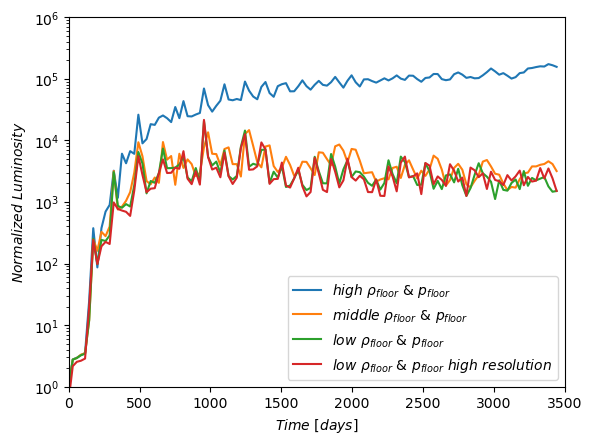

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.array(time_lc_22)/3600/24,np.array(int_lum_22)/int_lum_22[0], label=r"$high\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_23)/3600/24,np.array(int_lum_23)/int_lum_23[0], label=r"$middle\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_25)/3600/24,np.array(int_lum_25)/int_lum_25[0], label=r"$low\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_26)/3600/24,np.array(int_lum_26)/int_lum_25[0], label=r"$low\ \rho_{floor} \ & \ p_{floor}\ high\ resolution$")
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('$Time\\ [days]$')
ax.set_ylabel('$Normalized\\ Luminosity$')
ax.set_xlim(0,3500)
ax.set_ylim(1,1e6)
ax.legend()

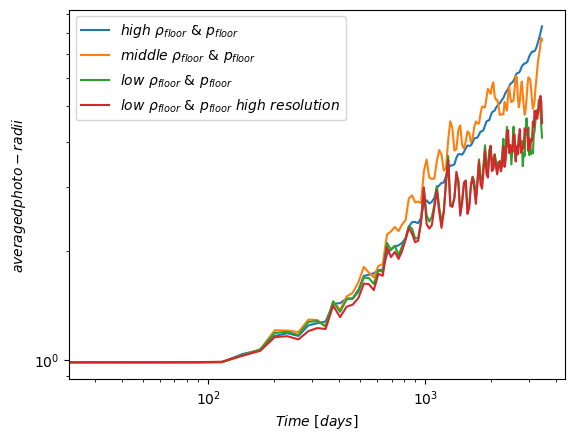

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.array(time_lc_22)/3600/24,np.array(radii_aver_22)/radius, label=r"$high\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_23)/3600/24,np.array(radii_aver_23)/radius, label=r"$middle\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_25)/3600/24,np.array(radii_aver_25)/radius, label=r"$low\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_26)/3600/24,np.array(radii_aver_26)/radius, label=r"$low\ \rho_{floor} \ & \ p_{floor}\ high\ resolution$")
#ax.axvline(x=np.pi*(1.14e11**3/c.G/c.msun)**0.5/3600/24+2e3/3600/24)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$Time\\ [days]$')
ax.set_ylabel('$averaged photo-radii$')
#ax.set_xlim(0,4)
#ax.set_ylim(1,1e11)
ax.legend()
plt.show()

Constants defined...


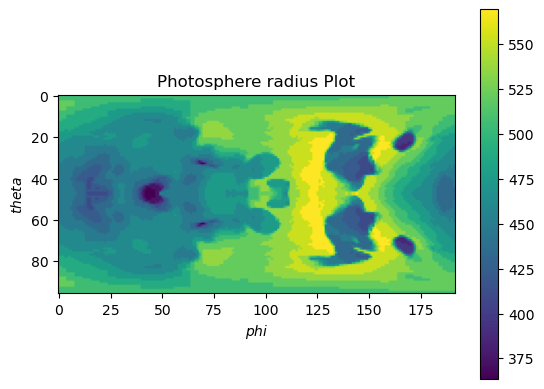

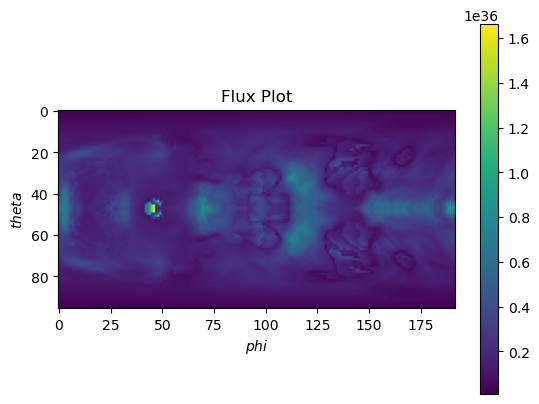

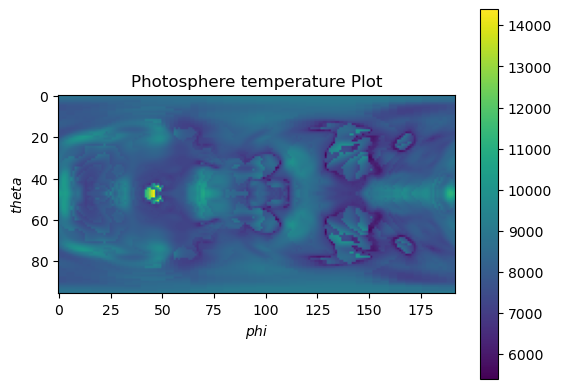

In [3]:
import light_curve_modified as lc
base_dir = '../../data/planetary_engulfment_test39/'

#data = athdf(base_dir+'/PEGM.out1.00046.athdf',x1_min=4868500000000.0,x1_max= 9041500000000.0)
data = athdf(base_dir+'/PEGM.out1.00400.athdf')
#data = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,
#                       get_energy=False,profile_file=base_dir+'polytrope.dat')
wavelength = 10

op_radii,op_id = lc.optical_depth_radial(data, wavelength,opac_model='mesa_exe')
flux = lc.flux_radial(data,op_radii,op_id,wavelength,lum_bolo=True)

Constants defined...


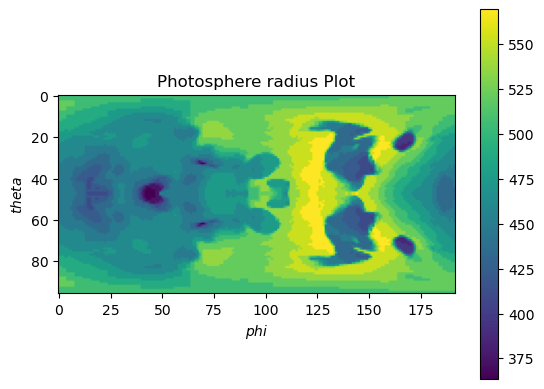

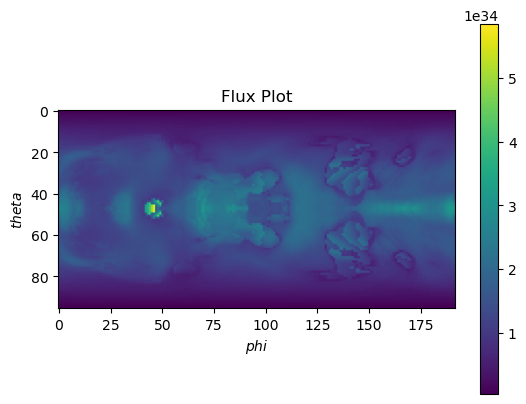

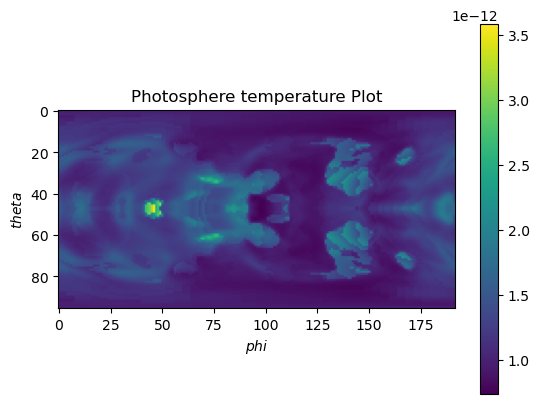

In [3]:
import light_curve_modified as lc
base_dir = '../../data/planetary_engulfment_test39/'

#data = athdf(base_dir+'/PEGM.out1.00046.athdf',x1_min=4868500000000.0,x1_max= 9041500000000.0)
data = athdf(base_dir+'/PEGM.out1.00400.athdf')
#data = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,
#                       get_energy=False,profile_file=base_dir+'polytrope.dat')
wavelength = 10

op_radii,op_id = lc.optical_depth_radial(data, wavelength,opac_model='mesa_exe')
flux = lc.flux_radial(data,op_radii,op_id,wavelength,lum_bolo=True)

Constants defined...


/dssg/home/acct-phywfy/phywfy/yangmengqi/Athena++/MM-athena-public-version-athena21/vis/python/light_curve_modified.py:129: RuntimeWarning: divide by zero encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


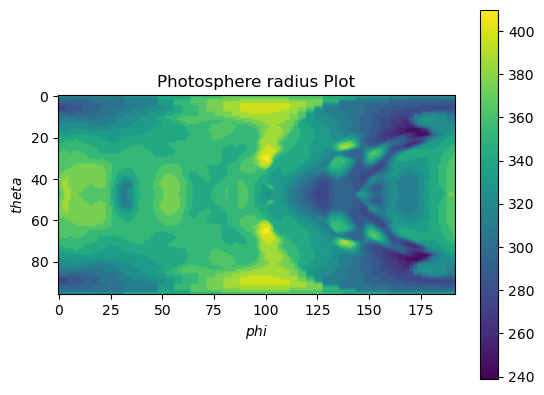

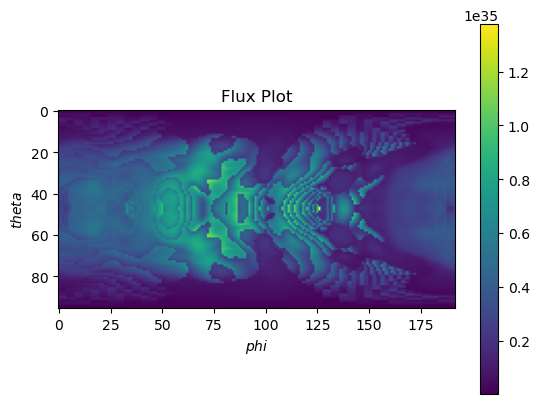

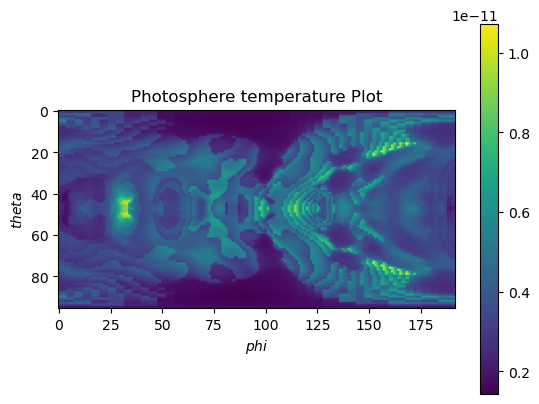

In [3]:
import light_curve_modified as lc
base_dir = '../../data/planetary_engulfment_test39/'

#data = athdf(base_dir+'/PEGM.out1.00046.athdf',x1_min=4868500000000.0,x1_max= 9041500000000.0)
data = athdf(base_dir+'/PEGM.out1.00400.athdf')
#data = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,
#                       get_energy=False,profile_file=base_dir+'polytrope.dat')
wavelength = 10

op_radii,op_id = lc.optical_depth_radial(data, wavelength)
flux = lc.flux_radial(data,op_radii,op_id,wavelength,lum_bolo=True)

In [18]:
op_radii[96,48]

13851759214592.0

In [7]:
import matplotlib as mpl

mpl.rcParams.update({

    # Use LaTeX to write all text
    #"text.usetex": True,
    #"font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    # Non-italic math
    "mathtext.default": "regular",
    # Tick settings
    "xtick.direction" : "in",
    "ytick.direction" : "in",
    "xtick.top" : True,
    "ytick.right" : True,
    # Short dash sign
    "axes.unicode_minus" : True
})
#mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

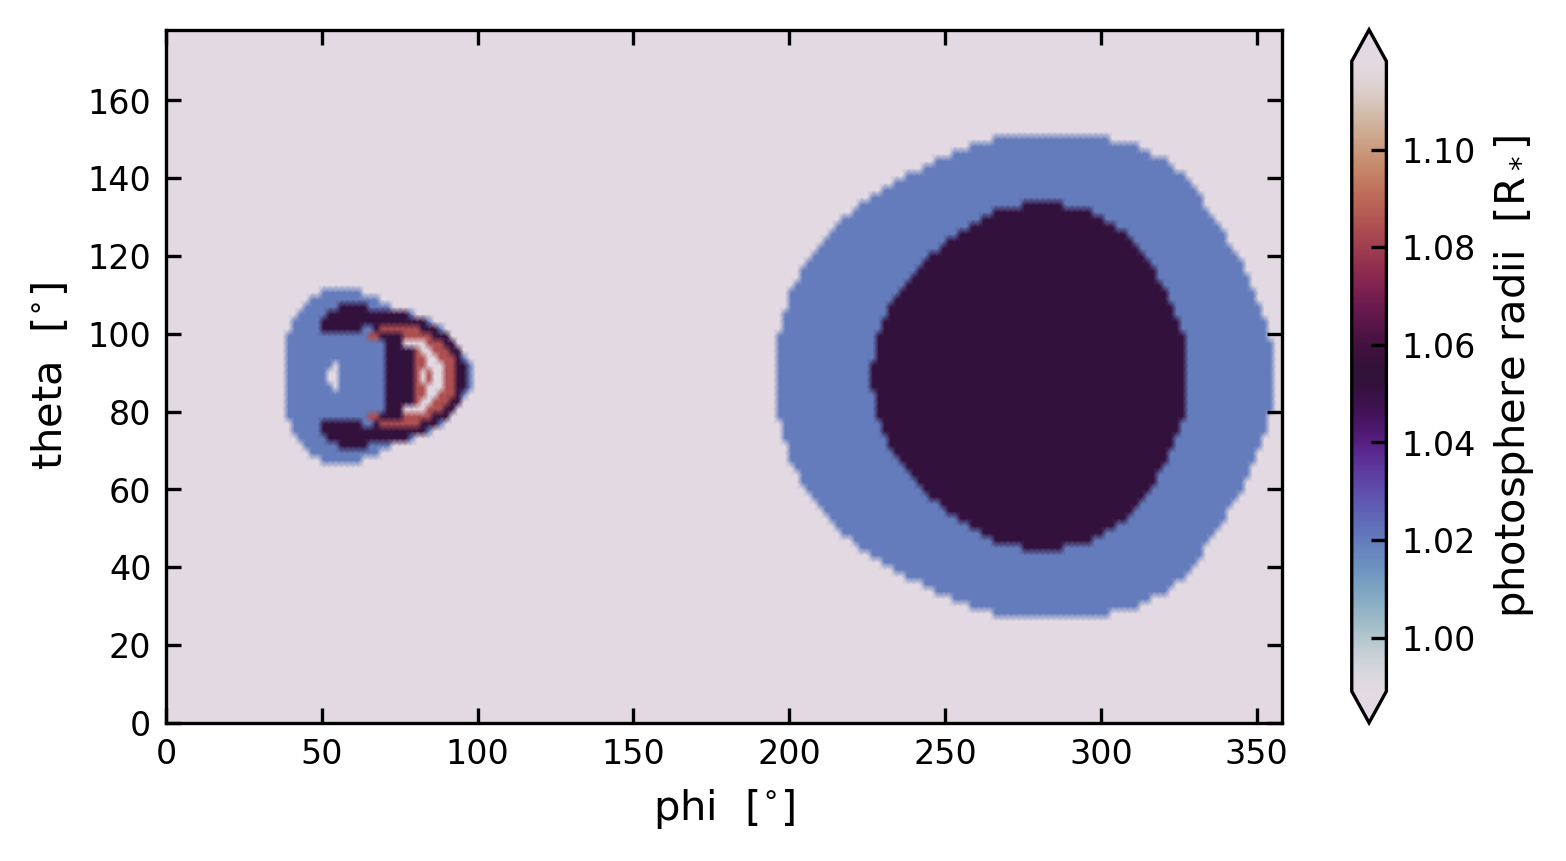

In [19]:
#plot the orbits
phi   = 360*np.arange(np.shape(op_radii)[0])/np.shape(op_radii)[0]
theta = 180*np.arange(np.shape(op_radii)[1])/np.shape(op_radii)[1]

phi_grid, theta_grid = np.meshgrid(phi,theta)

fig = plt.figure(figsize=(6,3), dpi=300)
ax = fig.add_subplot(111)
im=ax.pcolormesh(phi_grid, theta_grid, op_radii.T/100/c.rsun, cmap='twilight',shading='gouraud')

ax.set_xlabel('$phi \ \ [^{\circ}]$', fontsize=10)
ax.set_ylabel('$theta \ \ [^{\circ}]$', fontsize=10)
cb=plt.colorbar(im,extend='both',label=r'$photosphere \  radii \ \ [R_*]$')



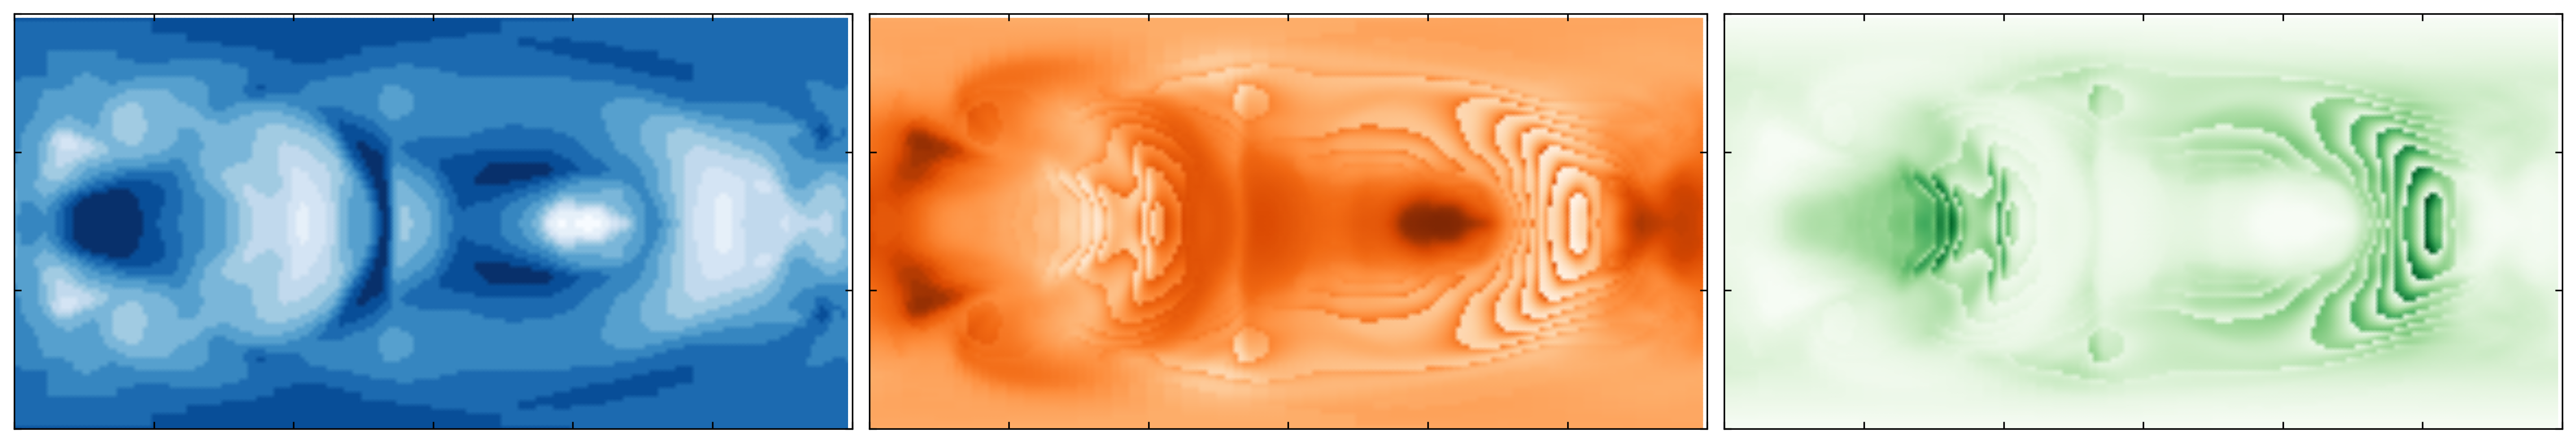

In [49]:
phi   = 360*np.arange(np.shape(op_radii)[0])/np.shape(op_radii)[0]
theta = 180*np.arange(np.shape(op_radii)[1])/np.shape(op_radii)[1]

phi_grid, theta_grid = np.meshgrid(phi,theta)

fig = plt.figure(figsize=(18, 3), dpi=300,layout='constrained')
axs = fig.subplots(1,3, sharex=True)

axs[0].pcolormesh(phi_grid, theta_grid, op_radii.T/100/c.rsun, cmap='Blues',shading='gouraud')
axs[1].pcolormesh(phi_grid, theta_grid, flux[1].T, cmap='Oranges_r',shading='gouraud')
axs[2].pcolormesh(phi_grid, theta_grid, flux[0].T, cmap='Greens',shading='gouraud')

for i in range(3):
    axs[i].set_xticks([0,60,120,180,240,300,360], ["", "", "", "", "", "", ""])
    axs[i].set_yticks([0,60,120,180], ["", "", "", ""])


In [22]:
import light_curve_modified as lc
base_dir = '../../data/planetary_engulfment_test39/'

data = athdf(base_dir+'/PEGM.out1.00400.athdf',level=0,subsample=True)
# mylevel = None
# data = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,
#                        get_energy=False,profile_file=base_dir+'polytrope.dat')

direction='z'
a=20
ob_grid=lc.observer_grid(100,box_half_length = a*100*c.rsun,direction=direction)
wavelength = 800
pho_pos = lc.optical_depth(data,wavelength,ob_grid,direction=direction,opac_model="mesa_exe",plot=False)
# pho_pos = lc.optical_depth(data,wavelength,ob_grid,direction=direction,plot=False)

#print(np.max(pho_pos)/c.rsun)


reading orbit file for binary simulation...


(-20.0, 20.0)

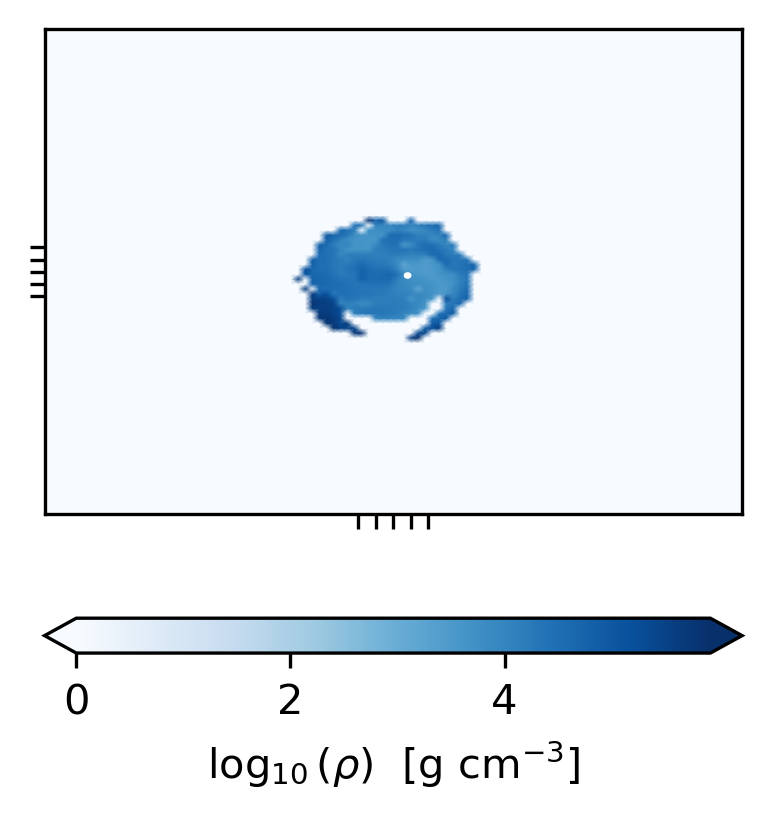

In [23]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.add_subplot(111)
#ax.imshow(np.where(np.linalg.norm(pho_pos,axis=2)>990*c.rsun,0,np.linalg.norm(pho_pos,axis=2))/100/c.rsun)
im=ax.pcolormesh(ob_grid[0,:,0]/100/c.rsun, ob_grid[:,0,1]/100/c.rsun, np.where(np.linalg.norm(pho_pos,axis=2)>1000*c.rsun,0,np.linalg.norm(pho_pos,axis=2))/100/c.rsun,cmap='Blues',shading='gouraud')
# im=ax.pcolormesh(ob_grid[0,:,1]/100/c.rsun, ob_grid[:,0,2]/100/c.rsun, np.where(np.linalg.norm(pho_pos,axis=2)>1000*c.rsun,0,np.linalg.norm(pho_pos,axis=2))/100/c.rsun,cmap='Blues',shading='gouraud')
cb1=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]', location='bottom')

orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
x2,y2,z2 = ou.pos_secondary(orb,data['Time'])

rcom,vcom = ou.rcom_vcom(orb,data['Time'])
ax.add_patch(plt.Circle([(x2-rcom[0])/100/c.rsun,(y2-rcom[1])/100/c.rsun],radius=0.1,color='white') )
ax.set_xticks([-2,-1,0,1,2], ["", "", "", "", ""])
ax.set_yticks([-2,-1,0,1,2], ["", "", "", "", ""])
ax.set_xlim(-a,a)
ax.set_ylim(-a,a)

reading orbit file for binary simulation...


(-10.0, 10.0)

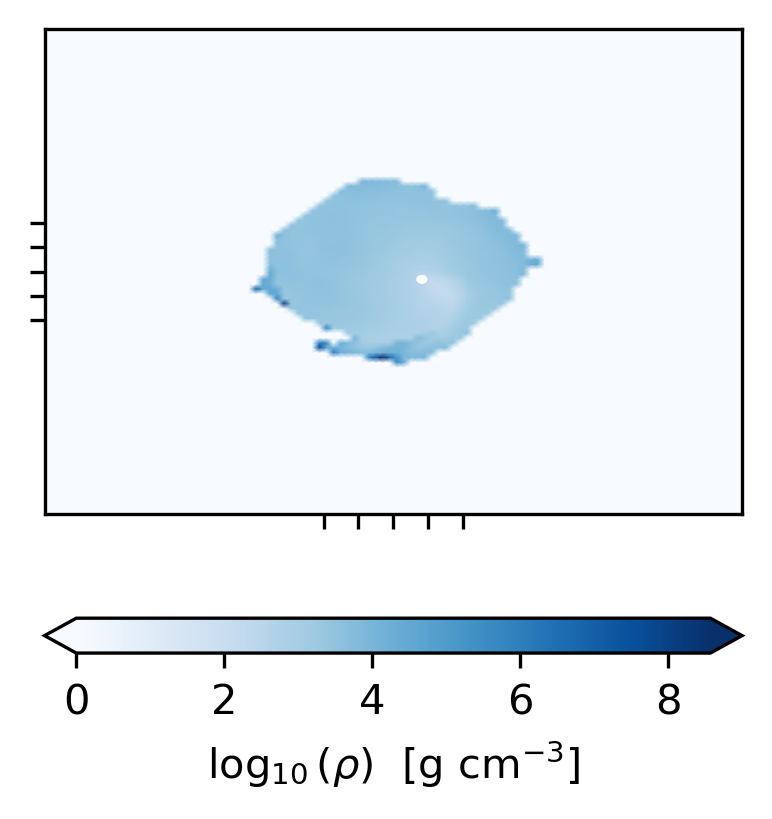

In [17]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.add_subplot(111)
#ax.imshow(np.where(np.linalg.norm(pho_pos,axis=2)>990*c.rsun,0,np.linalg.norm(pho_pos,axis=2))/100/c.rsun)
im=ax.pcolormesh(ob_grid[0,:,0]/100/c.rsun, ob_grid[:,0,1]/100/c.rsun, np.where(np.linalg.norm(pho_pos,axis=2)>1000*c.rsun,0,np.linalg.norm(pho_pos,axis=2))/100/c.rsun,cmap='Blues',shading='gouraud')
# im=ax.pcolormesh(ob_grid[0,:,1]/100/c.rsun, ob_grid[:,0,2]/100/c.rsun, np.where(np.linalg.norm(pho_pos,axis=2)>1000*c.rsun,0,np.linalg.norm(pho_pos,axis=2))/100/c.rsun,cmap='Blues',shading='gouraud')
cb1=plt.colorbar(im,extend='both',label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]', location='bottom')

orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
x2,y2,z2 = ou.pos_secondary(orb,data['Time'])

rcom,vcom = ou.rcom_vcom(orb,data['Time'])
ax.add_patch(plt.Circle([(x2-rcom[0])/100/c.rsun,(y2-rcom[1])/100/c.rsun],radius=0.1,color='white') )
ax.set_xticks([-2,-1,0,1,2], ["", "", "", "", ""])
ax.set_yticks([-2,-1,0,1,2], ["", "", "", "", ""])
ax.set_xlim(-a,a)
ax.set_ylim(-a,a)

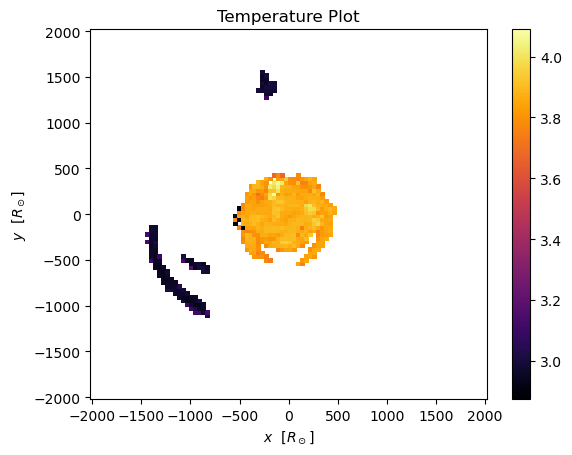

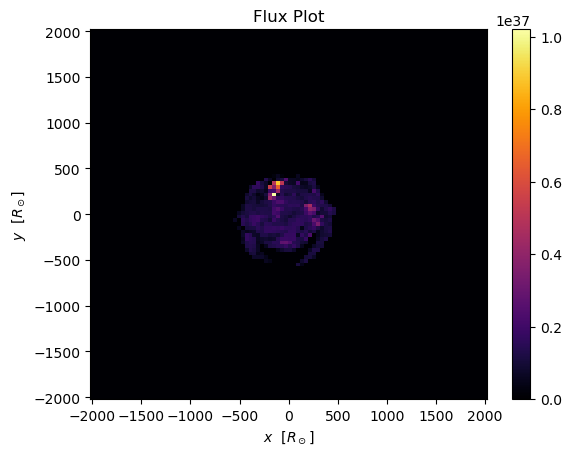

In [24]:
wavelength =10
flux_1 = lc.temp_flux(data,pho_pos, ob_grid,wavelength,direction=direction)
flux_2 = lc.flux_pho(data,pho_pos, ob_grid,wavelength,lum_bolo=True,direction=direction)

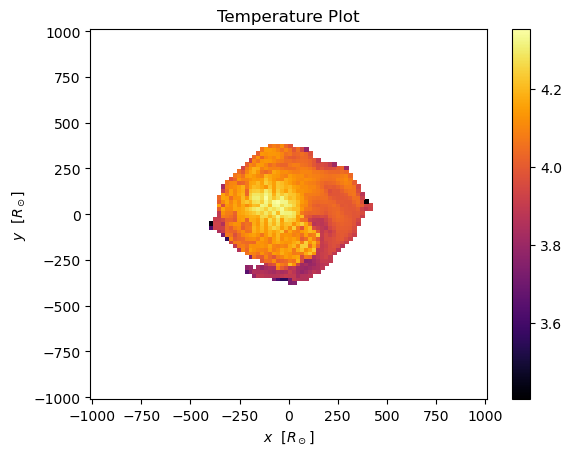

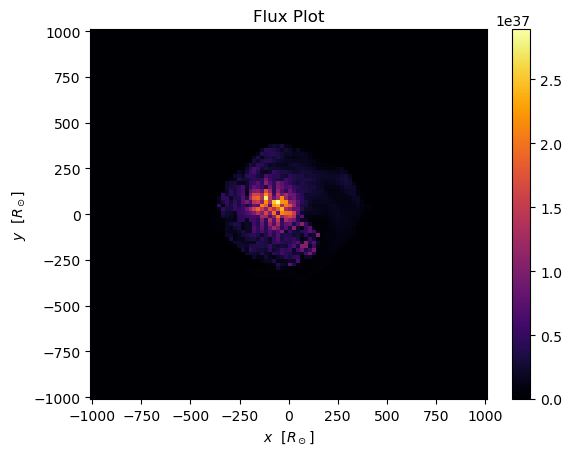

In [18]:
wavelength =10
flux_1 = lc.temp_flux(data,pho_pos, ob_grid,wavelength,direction=direction)
flux_2 = lc.flux_pho(data,pho_pos, ob_grid,wavelength,lum_bolo=True,direction=direction)

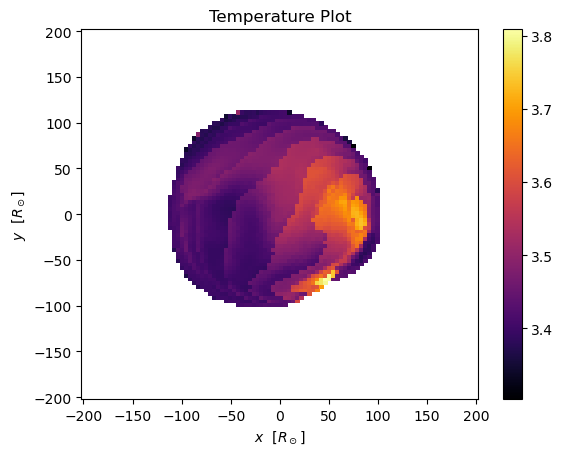

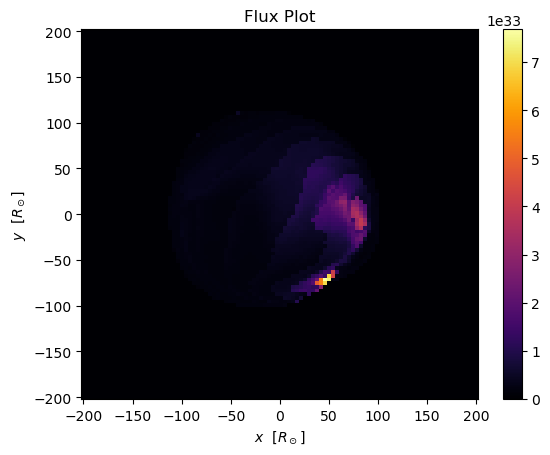

In [28]:
wavelength =10
flux_1 = temp_flux(data,pho_pos, ob_grid,wavelength,direction=direction)
flux_2 = flux_pho(data,pho_pos, ob_grid,wavelength,lum_bolo=True,direction=direction)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ar
import OrbitAnalysisUtils as ou
import Constants 

from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm.auto import tqdm
#from skimage import measure
import scipy
from scipy.interpolate import RegularGridInterpolator
from scipy.special import expit
from athena_read import athdf

c=Constants.Constants()

from scipy import optimize

# EOS(radiation pressure and ideal gas pressure)
# P/rho = 4*c.sigmaSB*x**4/3/c.c/rho+c.kB*x/1.25*2/c.mp

def temp_rad_gas(rho,press):
    f = lambda x, rho,epsilon: 4*c.sigmaSB*x**4/3/c.c/rho+c.kB*x/1.25*2/c.mp-epsilon
    fder = lambda x, rho,epsilon: 16*c.sigmaSB*x**3/3/c.c/rho+c.kB/1.25*2/c.mp
    
    x = 1e3*np.ones_like(rho)
    epsilon = press/rho
    
    return optimize.newton(f, x, fprime=fder, args=(rho,epsilon, ), maxiter=200)

#  interp functions
def get_interp_function(d,var,rescale_factor=1,method = 'nearest'): #'
    """
    MM: Use RegularGridInterpolator to pass data to interpolating function for a given variable
    Parameters
    -----------
    d : dict
       athena data dict from read_data
    var: str
       name of variable to be interpolated
       
    Returns
    --------
    var_interp: an interpolating function that can be called with a tuple (phi,theta,r)
    """
    dph = np.gradient(d['x3v'])[0]
    dtheta = np.gradient(d['x2v'])[0]
    two_pi = ( (d['x3v'][-1]-d['x3v'][0]+dph) /(2*np.pi) > 0.99 ) # boolean to determine if spans 2pi in phi
    x1v = d['x1v']*rescale_factor
    var_shape = d[var].shape
    
    if two_pi:
        x3v = np.append(d['x3v'][0]-dph,d['x3v'])
        x3v = np.append(x3v,x3v[-1]+dph)
        var_data = np.append([d[var][-1]],d[var],axis=0)
        var_data = np.append(var_data,[var_data[0]],axis=0)
        var_shape = var_data.shape
    else:
        x3v = d['x3v']
        var_data = d[var]
        
    # extend in theta
    x2v = np.append(d['x2v'][0]-dtheta,d['x2v'])
    x2v = np.append(x2v,x2v[-1]+dtheta)
    var_data = np.append(var_data[:,0,:].reshape(var_shape[0],1,var_shape[2]),var_data,axis=1)
    var_data = np.append(var_data,var_data[:,-1,:].reshape(var_shape[0],1,var_shape[2]),axis=1)
        
    var_interp = RegularGridInterpolator((x3v,x2v,x1v),var_data,bounds_error=False,method=method)
    return var_interp

def cart_to_polar(x,y,z):
    """cartesian->polar conversion (matches 0<phi<2pi convention of Athena++)
    Parameters
    x, y, z
    Returns
    r, th, phi
    """
    r = np.sqrt(x**2 + y**2 +z**2)
    th = np.arccos(z/r)
    phi = np.arctan2(y,x)
    phi = np.where(phi>=0,phi,phi+2*np.pi)
    return np.stack((r, th, phi), axis=2)

def mesh_interpolate_at_xyzpoints(d,var,points):
    """
    MM: convience function to interpolate a variable to mesh points
    Parameters
    -----------
    d: athena++ data dict
    var: str variable name in, e.g. "rho"
    points: array of cartesian positions (eg vertices or centroids) (n,n,3) floats (x,y,z)
    """
    var_interp = get_interp_function(d,var)
    rp,thp,php = cart_to_polar(points[:,:,0],points[:,:,1],points[:,:,2])
    return var_interp( (php,thp,rp) )

### integrate along radius from every solid angle
mylevel = None

# considering Hydrogen and ff opacity
def ff_opacity(rho, temp, wavelength):
    # in cgs unit
    opacity = 4.97*rho**2/temp**0.5*wavelength**3*1000
    return opacity

def Rosseland_mean_opacity(rho,temp):
    # in cgs unit
    opacity = 8e22*temp**(-7/2)*rho**2
    return opacity

def opac(rho,temp,X,Z):
    # in cgs units
    # molecules
    kappa_m = 0.1*Z
    
    # negative hydrogen ion
    kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
    
    # electron scattering
    kappa_e = 0.2*(1+X)/(1+2.7e11*rho/temp**2)/(1+(temp/4.5e8)**0.86)
    
    # Kramers formula
    kappa_K = 4e25*(1+X)*(Z+0.001)*rho/temp**3.5
    
    opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
    
    return opacity

def observer_grid(n, box_half_length = 1.0865e11, method = 'uniform',direction ='z'):
    #n*n*3 rectangle gird
    
    if method == 'uniform':
        obs_grid_xx = box_half_length*np.ones((n,n))
        pos_yy = np.linspace(-box_half_length, box_half_length, n)
        pos_zz = pos_yy
        obs_grid_yy,obs_grid_zz = np.meshgrid(pos_yy, pos_zz)
        
        if direction == 'x':
            obs_grid = np.stack((obs_grid_xx, obs_grid_yy, obs_grid_zz), axis=2)
            
        if direction == 'z':
            obs_grid = np.stack((obs_grid_yy, obs_grid_zz, obs_grid_xx), axis=2)
            
        if direction == 'y':
            obs_grid = np.stack((obs_grid_yy, obs_grid_xx, obs_grid_zz), axis=2)
        if direction == '-y':
            obs_grid = np.stack((obs_grid_yy, -obs_grid_xx, obs_grid_zz), axis=2)
    return obs_grid

def optical_depth(data, wavelength, obs_grid, rescale_factor=1, dx = -1, direction = 'x',plot = True):
    """Marching the obs_grid along given direction to find the photo-spheric position
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    obs_grid: observer grid, (n,n) matrix
    direction: observer direction: 'x','y','z'; all from positive axis to negtive
    
    Returns: (n,n,3) array with photo-spheric position in cartesian coordinates, found with coordinate<9*domain_size, not found with
    coordinate=10*domain size
    """
    r0_thersh=0.6
    ## initializition
    n = len(obs_grid)
    op_dep = np.zeros((n,n))
    marching_box_xyz = obs_grid.copy()
    
    # computitional domain size
    domain_size = np.max(obs_grid)
    #print(domain_size)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    pho_position = np.ones((n,n,3))*domain_size*10
    
    ## get interpolation function
    rho_star = np.where(data['r0']>r0_thersh,data['rho']*data['r0']/rescale_factor**2,0)
    rho_star_dict = {'rho_star':rho_star}
    data.update(rho_star_dict)
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    #temp = temp_rad_gas(data['rho'],data['press'])
    temp = data['press']/data['rho']*c.mp/2/c.kB/rescale_factor
    temp_dict = {'temp':temp}
    data.update(temp_dict)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    if dx == -1:
        dx = cell_size/10
        
    if direction == 'x':
        marching_pos = np.min(marching_box_xyz[:,:,0])
    if direction == 'y':
        marching_pos = np.min(marching_box_xyz[:,:,1])
    if direction == '-y':
        marching_pos = np.min(marching_box_xyz[:,:,1])
    if direction == 'z':
        marching_pos = np.min(marching_box_xyz[:,:,2])
    
    flag = -1 if marching_pos<0 else 1
    dx= flag*dx
    
        
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n,n)) 
        
    #print('marching_pos', marching_pos)
    while flag*marching_pos>-domain_size:
        # marching half step
        marching_pos = marching_pos-dx/2
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx/2
        if direction == 'y' or direction == '-y':
            marching_box_xyz[:,:,1] -= dx/2
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx/2
        
        # get density and temperature to get opacity
        marching_box_rtp = cart_to_polar(marching_box_xyz[:,:,0],marching_box_xyz[:,:,1],marching_box_xyz[:,:,2])
        rho_box = interp_rho((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
        rho_box = np.where(np.isnan(rho_box), 10**10, rho_box)
        #print(rho_box)
        temp_box = interp_temp((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
            
        # integral optical depth
        #op_dep_new = op_dep + ff_opacity(rho_box,temp_box,wavelength)*dx
        #op_dep_new = op_dep + Rosseland_mean_opacity(rho_box,temp_box)*dx
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*abs(dx)
        
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        success = np.where(op_dep>=1,success+1,success)
        
        # once success, add adaptive refinement grid
        #if np.all(op_dep_new_new==op_dep):
        #    pass
            
        # marching half step
        marching_pos = marching_pos-dx/2
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx/2
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx/2
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx/2    

        
            
        # if first success, restore the success coordinates
        pho_position[:,:,0] = np.where(success == 0.,marching_box_xyz[:,:,0],pho_position[:,:,0])
        pho_position[:,:,1] = np.where(success == 0.,marching_box_xyz[:,:,1],pho_position[:,:,1])
        pho_position[:,:,2] = np.where(success == 0.,marching_box_xyz[:,:,2],pho_position[:,:,2])
                
        
        
            
        success = np.where(success>=1,1,success)
            
       
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    #pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
    #pho_radius = np.where(pho_radius>10,0,pho_radius)
    # plot
    if plot: 
        pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
        pho_radius = np.where(pho_radius>9.9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
        if direction =='x':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return pho_position

def Blackbody(wavelength,temp):
    """
    Planck blackbody emission, in cgs units, wavelength in nm
    """
    a = 2*c.h*c.c**2
    b = c.h*c.c/(wavelength*1e-7)/c.kB/temp
    return a/(wavelength*1e-7)**5/(np.exp(b)-1.0)


def flux_pho(data,pho_pos,grid,wavelength,rescale_factor=1,lum_bolo=False, plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    interp_r0 = get_interp_function(data,'r0',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    pho_r0 = interp_r0((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
       
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()

    return flux

def temp_flux(data,pho_pos,grid,wavelength,rescale_factor=1,plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    
    flux_intensity = np.where(pho_radius==0,np.NAN,pho_temp)
    flux = flux_intensity
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Temperature Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def integrated_luminosity(id_order):
    """
    Sum the flux to get integrated luminosity
    """
    # read data
    id_name = id_order+start_id
    datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                    get_energy=False,profile_file=dirname+'polytrope.dat')
    time = data['Time']
        
    pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
    flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
    int_lum = np.sum(flux_con)
    
    return int_lum, time
    
def light_curve(dirname, start_time, end_time, time_incre, wavelength, grid_size, plot = True, direction ='z'):
    """
    Temporal evolution of the integrated luminosity
    """
    
    # find data file by time and loop over files
    start_id = round(start_time/time_incre)-10
    end_id = round(end_time/time_incre)+10
    file_num = end_id-start_id+1
    
    lum_time = np.zeros(file_num)
    time = np.zeros(file_num)
    
    ob_grid=observer_grid(grid_size,direction=direction) # should be fixed
    
    #from multiprocessing import Pool
    
    #with Pool(64) as p:
        #lum_time, time=p.map(integrated_luminosity, id_order,start_id,dirname,orb,mylevel,wavelength,ob_grid,direction)
        
    
   #""" 
    # Non-parrallel
    for id_order in range(file_num):
        # read data
        id_name = id_order+start_id
        datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
        data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')
        time[id_order] = data['Time']
        
        pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
        flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
        int_lum = np.sum(flux_con)
        lum_time[id_order] = int_lum
   # """
    
    if plot:
        plt.plot(time,lum_time)
        plt.title('Light Curve')
        plt.xlabel('$Time$')
        plt.ylabel('$Luminosity$')
        plt.show()
        
def light_curve_parallel(id_name, plot_interv, wavelength, time, int_lum,ob_grid, direction,base_dir):
    """
    Temporal evolution of the integrated luminosity(parallel execution)
    ----
    Argments: tuple of (id_name, wavelength)
    """
    
    
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    mylevel = None
    
    datafile = base_dir + "PEGM.out1."+str(id_name*plot_interv).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                get_energy=False,profile_file=base_dir+'polytrope.dat')
    
    pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction,plot=False)
    flux_con = flux_pho(data,pho_pos, ob_grid,wavelength,lum_bolo=False,plot = False, direction=direction)

    time[id_name] = data['Time']
    int_lum[id_name] = np.sum(flux_con, dtype=np.float64)
    
    
    
def light_curve_parallel_plot(plot_num, plot_interv, wavelength,base_dir,grid_size,direction):
    """
    Use multiprocessing.Process to parallel execution
    """
    from multiprocessing import Pool,Array,Process,Manager
    
     
    p_list = []
    manager = Manager()
    time = manager.Array('d',np.arange(plot_num))
    int_lum = manager.Array('d',np.arange(plot_num))
    ob_grid = observer_grid(100, box_half_length =grid_size, direction=direction)

     
    pool = Pool(20)
    for i in np.arange(plot_num):
        pool.apply_async(light_curve_parallel, args=(i,plot_interv,wavelength, time, int_lum, ob_grid,direction,base_dir))
    
    pool.close()
    pool.join()

    print('done!')
    return time, int_lum       


     
    
def optical_depth_radial(data, wavelength, rescale_factor=1, dx = -1,plot = True):
    """Marching along the radial direction from outter boundary to find photosphere radii
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    Returns: 
    (n_phi,n_theta) array with photosphere radii('x1v') of each solid angle interval
    (n_phi,n_theta) array with photosphere radii id of each solid angle interval 
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    op_dep = np.zeros((n_phi,n_theta))
    pho_radii = np.ones((n_phi,n_theta))*data['x1v'][-1]
    pho_id    = np.ones((n_phi,n_theta))*int(len(data['x1v'])-1)
    op_dep_id = int(len(data['x1v'])-1)
    
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n_phi,n_theta)) 
    
    ## get data
    # correction for r0
    r0_thresh =0.9
    rho_star = np.where(data['r0']>r0_thresh,data['rho']*data['r0'],0)
     
    #rho_star = data['rho']*data['r0']
    #temp = temp_rad_gas(data['rho'],data['press'])
    temp = data['press']/data['rho']*c.mp*1.25/2/c.kB

    while np.any(success==-1):
        
        rho_box  = rho_star[:,:,op_dep_id]
        temp_box = temp[:,:,op_dep_id]
            
        dx = data['x1f'][op_dep_id+1]-data['x1f'][op_dep_id]
            
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*dx
        op_dep_new = np.nan_to_num(op_dep_new, nan=0, posinf=1000, neginf=-1000)

        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        success = np.where(op_dep>=1,success+1,success)
        
        # if first success, restore the success coordinates
        pho_radii = np.where(success==0,data['x1v'][op_dep_id],pho_radii)
        pho_id = np.where(success==0,op_dep_id,pho_id)
        
        """
        if np.any(success==0):
            pho_radii = np.where(success==0,data['x1v'][op_dep_id-1],pho_radii)
            pho_id = np.where(success==0,op_dep_id-1,pho_id)
            
        """
        
        #marching
        op_dep_id -= 1
        success = np.where(success>=1,1,success)
        
            
    # plot
    if plot: 
        plt.imshow(pho_radii.T/c.rsun)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere radius Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    return pho_radii,pho_id

def flux_radial(data,pho_radii,pho_id,wavelength,rescale_factor=1,lum_bolo=False, plot = True, temp_plot = True):
    """
    Synthetic photometry, Planck blackbody emission flux
    F=\sigma*T^4*d\theta*d\phi*sin(theta)*r^2
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    rho_star = data['rho']*data['r0']
    #temp = temp_rad_gas(data['rho'],data['press'])
    temp = data['press']/data['rho']*c.mp*1.25/2/c.kB
    pho_temp = np.zeros_like(pho_radii,dtype=float)
    pho_rho = np.zeros_like(pho_radii,dtype=float)
    pho_dr = np.zeros_like(pho_radii,dtype=float)
    flux = np.zeros_like(pho_radii,dtype=float)
    
    for ii in range(n_phi):
        for jj in range(n_theta):
            r_id = int(pho_id[ii,jj])
            pho_temp[ii,jj] = temp[ii,jj,r_id]
            pho_rho[ii,jj] = rho_star[ii,jj,r_id]
            pho_dr[ii,jj] = (data['x1f'][r_id+1]-data['x1f'][r_id])
            
            
            
    area = np.pi/n_theta*2*np.pi/n_phi*np.outer(np.ones(n_phi),np.sin(data['x2v']))*pho_radii**2
    pho_aver_radii = np.sqrt(np.sum(area)/4/np.pi)
    pho_aver_rho = np.sum(pho_rho*area* pho_dr)/np.sum(area* pho_dr)
    
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    pho_aver_temp = (np.sum(flux)/np.sum(area)/c.sigmaSB)**0.25        
    
    # plot
    if plot: 
        plt.imshow(flux.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Flux Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    if temp_plot:
        plt.imshow(pho_temp.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere temperature Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()

    return flux,pho_aver_radii,pho_aver_temp,pho_aver_rho
        
def light_curve_radial_parallel(id_name, plot_interv, wavelength, time, int_lum, radii_aver, temp_aver,base_dir):
    """
    Temporal evolution of the integrated luminosity(parallel execution)
    ----
    Argments: tuple of (id_name, wavelength)
    """
    
    
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    mylevel = None
    
    datafile = base_dir + "PEGM.out1."+str(id_name*plot_interv).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                get_energy=False,profile_file=base_dir+'polytrope.dat')
    
    op_radii,op_id = optical_depth_radial(data, wavelength,plot=False)
    flux,radii,temp = flux_radial(data,op_radii,op_id,wavelength,lum_bolo=True,plot = False, temp_plot = False)
    time[id_name] = data['Time']
    int_lum[id_name] = np.sum(flux)
    radii_aver[id_name] = radii
    temp_aver[id_name] = temp
    
    
def light_curve_radial_parallel_plot(plot_num, plot_interv, wavelength,base_dir):
    """
    Use multiprocessing.Process to parallel execution
    """
    from multiprocessing import Pool,Array,Process,Manager
    
     
    p_list = []
    manager = Manager()
    time = manager.Array('d',np.arange(plot_num))
    int_lum = manager.Array('d',np.arange(plot_num))
    radii_aver = manager.Array('d',np.arange(plot_num))
    temp_aver = manager.Array('d',np.arange(plot_num))
     
    pool = Pool(20)
    for i in np.arange(plot_num):
        pool.apply_async(light_curve_radial_parallel, args=(i,plot_interv,wavelength, time, int_lum, radii_aver, temp_aver,base_dir))
    
    pool.close()
    pool.join()

    print('done!')
    return time, int_lum, radii_aver,temp_aver        



Constants defined...


reading orbit file for binary simulation...


(-1.5, 1.5)

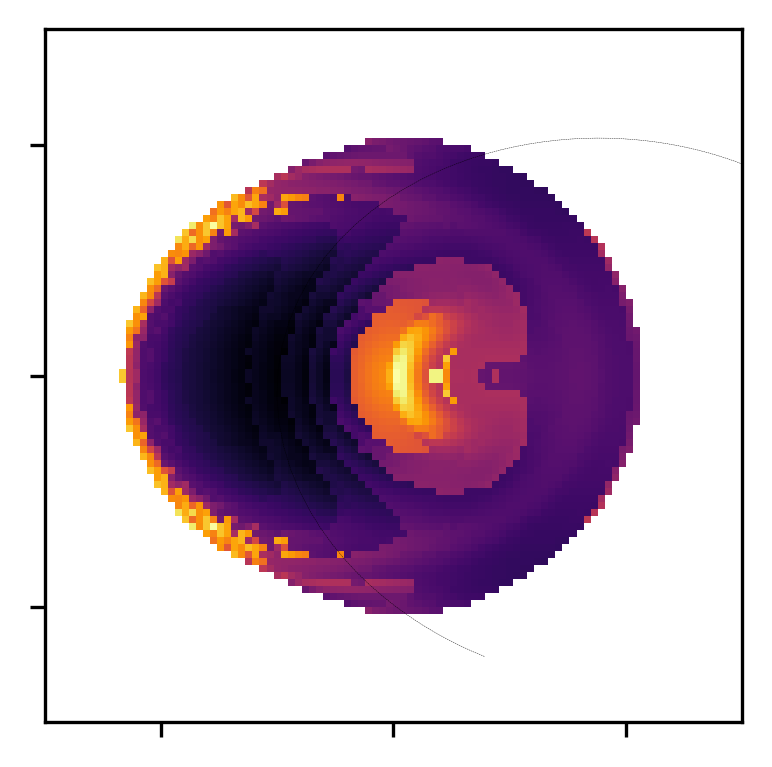

In [60]:
from matplotlib.colors import BoundaryNorm,Normalize, LogNorm
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.add_subplot(111)

Porb = 1e7
#ax.imshow(np.where(np.linalg.norm(pho_pos,axis=2)>990*c.rsun,0,np.linalg.norm(pho_pos,axis=2))/100/c.rsun)
im=ax.pcolormesh(ob_grid[:,0,2]/100/c.rsun, ob_grid[:,0,2]/100/c.rsun,flux_1,norm = LogNorm(),cmap='inferno',shading='auto')
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
x2,y2,z2 = ou.pos_secondary(orb,data['Time'])

rcom,vcom = ou.rcom_vcom(orb,data['Time'])
ax.add_patch(plt.Circle([(x2-rcom[0])/100/c.rsun,(y2-rcom[1])/100/c.rsun],radius=0.1,color='white') )

sel = (orb['time']>data['Time']-Porb/1) & (orb['time']<=data['Time'])

ax.plot((orb[sel]['x'])/100/c.rsun,(orb[sel]['y'])/100/c.rsun,'k--',lw=0.1)

ax.set_xticks([-2,-1,0,1,2], ["", "", "", "", ""])
ax.set_yticks([-2,-1,0,1,2], ["", "", "", "", ""])
ax.set_xlim(-a,a)
ax.set_ylim(-a,a)

In [19]:
10**3.5

3162.2776601683795

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ar
import OrbitAnalysisUtils as ou
import Constants 

from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm.auto import tqdm
#from skimage import measure
import scipy
from scipy.interpolate import RegularGridInterpolator
from scipy.special import expit
from athena_read import athdf

c=Constants.Constants()

from scipy import optimize

# EOS(radiation pressure and ideal gas pressure)
# P/rho = 4*c.sigmaSB*x**4/3/c.c/rho+c.kB*x/1.25*2/c.mp

def temp_rad_gas(rho,press):
    f = lambda x, rho,epsilon: 4*c.sigmaSB*x**4/3/c.c/rho+c.kB*x/1.25*2/c.mp-epsilon
    fder = lambda x, rho,epsilon: 16*c.sigmaSB*x**3/3/c.c/rho+c.kB/1.25*2/c.mp
    
    x = 1e3*np.ones_like(rho)
    epsilon = press/rho
    
    return optimize.newton(f, x, fprime=fder, args=(rho,epsilon, ), maxiter=200)

#  interp functions
def get_interp_function(d,var,rescale_factor=1,method = 'nearest'):
    """
    MM: Use RegularGridInterpolator to pass data to interpolating function for a given variable
    Parameters
    -----------
    d : dict
       athena data dict from read_data
    var: str
       name of variable to be interpolated
       
    Returns
    --------
    var_interp: an interpolating function that can be called with a tuple (phi,theta,r)
    """
    dph = np.gradient(d['x3v'])[0]
    dtheta = np.gradient(d['x2v'])[0]
    two_pi = ( (d['x3v'][-1]-d['x3v'][0]+dph) /(2*np.pi) > 0.99 ) # boolean to determine if spans 2pi in phi
    x1v = d['x1v']*rescale_factor
    var_shape = d[var].shape
    
    if two_pi:
        x3v = np.append(d['x3v'][0]-dph,d['x3v'])
        x3v = np.append(x3v,x3v[-1]+dph)
        var_data = np.append([d[var][-1]],d[var],axis=0)
        var_data = np.append(var_data,[var_data[0]],axis=0)
        var_shape = var_data.shape
    else:
        x3v = d['x3v']
        var_data = d[var]
        
    # extend in theta
    x2v = np.append(d['x2v'][0]-dtheta,d['x2v'])
    x2v = np.append(x2v,x2v[-1]+dtheta)
    var_data = np.append(var_data[:,0,:].reshape(var_shape[0],1,var_shape[2]),var_data,axis=1)
    var_data = np.append(var_data,var_data[:,-1,:].reshape(var_shape[0],1,var_shape[2]),axis=1)
        
    var_interp = RegularGridInterpolator((x3v,x2v,x1v),var_data,bounds_error=False,method=method)
    return var_interp

def cart_to_polar(x,y,z):
    """cartesian->polar conversion (matches 0<phi<2pi convention of Athena++)
    Parameters
    x, y, z
    Returns
    r, th, phi
    """
    r = np.sqrt(x**2 + y**2 +z**2)
    th = np.arccos(z/r)
    phi = np.arctan2(y,x)
    phi = np.where(phi>=0,phi,phi+2*np.pi)
    return np.stack((r, th, phi), axis=2)

def mesh_interpolate_at_xyzpoints(d,var,points):
    """
    MM: convience function to interpolate a variable to mesh points
    Parameters
    -----------
    d: athena++ data dict
    var: str variable name in, e.g. "rho"
    points: array of cartesian positions (eg vertices or centroids) (n,n,3) floats (x,y,z)
    """
    var_interp = get_interp_function(d,var)
    rp,thp,php = cart_to_polar(points[:,:,0],points[:,:,1],points[:,:,2])
    return var_interp( (php,thp,rp) )

### integrate along radius from every solid angle
mylevel = None

# considering Hydrogen and ff opacity
def ff_opacity(rho, temp, wavelength):
    # in cgs unit
    opacity = 4.97*rho**2/temp**0.5*wavelength**3*1000
    return opacity

def Rosseland_mean_opacity(rho,temp):
    # in cgs unit
    opacity = 8e22*temp**(-7/2)*rho**2
    return opacity

def opac(rho,temp,X,Z):
    # in cgs units
    # molecules
    kappa_m = 0.1*Z
    
    # negative hydrogen ion
    kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
    
    # electron scattering
    kappa_e = 0.2*(1+X)/(1+2.7e11*rho/temp**2)/(1+(temp/4.5e8)**0.86)
    
    # Kramers formula
    kappa_K = 4e25*(1+X)*(Z+0.001)*rho/temp**3.5
    
    opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
    
    return opacity

def observer_grid(n, box_half_length = 1.0865e11, method = 'uniform',direction ='z'):
    #n*n*3 rectangle gird
    
    if method == 'uniform':
        obs_grid_xx = box_half_length*np.ones((n,n))
        pos_yy = np.linspace(-box_half_length, box_half_length, n)
        pos_zz = pos_yy
        obs_grid_yy,obs_grid_zz = np.meshgrid(pos_yy, pos_zz)
        
        if direction == 'x':
            obs_grid = np.stack((obs_grid_xx, obs_grid_yy, obs_grid_zz), axis=2)
            
        if direction == 'z':
            obs_grid = np.stack((obs_grid_yy, obs_grid_zz, obs_grid_xx), axis=2)
            
        if direction == 'y':
            obs_grid = np.stack((obs_grid_yy, obs_grid_xx, obs_grid_zz), axis=2)
    return obs_grid

def optical_depth(data, wavelength, obs_grid, rescale_factor=1, dx = -1, direction = 'x',plot = True):
    """Marching the obs_grid along given direction to find the photo-spheric position
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    obs_grid: observer grid, (n,n) matrix
    direction: observer direction: 'x','y','z'; all from positive axis to negtive
    
    Returns: (n,n,3) array with photo-spheric position in cartesian coordinates, found with coordinate<9*domain_size, not found with
    coordinate=10*domain size
    """
    r0_thersh=0.9
    ## initializition
    n = len(obs_grid)
    op_dep = np.zeros((n,n))
    marching_box_xyz = obs_grid.copy()
    
    # computitional domain size
    domain_size = np.max(obs_grid)
    #print(domain_size)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    pho_position = np.ones((n,n,3))*domain_size*10
    
    ## get interpolation function
    rho_star = np.where(data['r0']>r0_thersh,data['rho']*data['r0']/rescale_factor**2,0)
    rho_star_dict = {'rho_star':rho_star}
    data.update(rho_star_dict)
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    #temp = temp_rad_gas(data['rho'],data['press'])
    temp = data['press']/data['rho']*c.mp/2/c.kB/rescale_factor
    temp_dict = {'temp':temp}
    data.update(temp_dict)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    if dx == -1:
        dx = cell_size/10
        
    if direction == 'x':
        marching_pos = np.min(marching_box_xyz[:,:,0])
    if direction == 'y':
        marching_pos = np.min(marching_box_xyz[:,:,1])
    if direction == 'z':
        marching_pos = np.min(marching_box_xyz[:,:,2])
        
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n,n)) 
        
    #print('marching_pos', marching_pos)
    while marching_pos>-domain_size:
        # marching half step
        marching_pos = marching_pos-dx/2
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx/2
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx/2
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx/2
        
        # get density and temperature to get opacity
        marching_box_rtp = cart_to_polar(marching_box_xyz[:,:,0],marching_box_xyz[:,:,1],marching_box_xyz[:,:,2])
        rho_box = interp_rho((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
        rho_box = np.where(np.isnan(rho_box), 10**10, rho_box)
        #print(rho_box)
        temp_box = interp_temp((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
            
        # integral optical depth
        #op_dep_new = op_dep + ff_opacity(rho_box,temp_box,wavelength)*dx
        #op_dep_new = op_dep + Rosseland_mean_opacity(rho_box,temp_box)*dx
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*dx
        
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        success = np.where(op_dep>=1,success+1,success)
        
        # once success, add adaptive refinement grid
        #if np.all(op_dep_new_new==op_dep):
        #    pass
            
            

        
            
        # if first success, restore the success coordinates
        pho_position[:,:,0] = np.where(success == 0.,marching_box_xyz[:,:,0],pho_position[:,:,0])
        pho_position[:,:,1] = np.where(success == 0.,marching_box_xyz[:,:,1],pho_position[:,:,1])
        pho_position[:,:,2] = np.where(success == 0.,marching_box_xyz[:,:,2],pho_position[:,:,2])
                
        # marching half step
        marching_pos = marching_pos-dx/2
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx/2
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx/2
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx/2
        
            
        success = np.where(success>=1,1,success)
            
       
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    #pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
    #pho_radius = np.where(pho_radius>10,0,pho_radius)
    # plot
    if plot: 
        pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
        pho_radius = np.where(pho_radius>9.9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
        if direction =='x':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return pho_position

def Blackbody(wavelength,temp):
    """
    Planck blackbody emission, in cgs units, wavelength in nm
    """
    a = 2*c.h*c.c**2
    b = c.h*c.c/(wavelength*1e-7)/c.kB/temp
    return a/(wavelength*1e-7)**5/(np.exp(b)-1.0)


def flux_pho(data,pho_pos,grid,wavelength,rescale_factor=1,lum_bolo=False, plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    interp_r0 = get_interp_function(data,'r0',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    pho_r0 = interp_r0((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
       
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()

    return flux

def temp_flux(data,pho_pos,grid,wavelength,rescale_factor=1,plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    
    flux_intensity = np.where(pho_radius==0,np.NAN,pho_temp)
    flux = flux_intensity
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Temperature Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def integrated_luminosity(id_order):
    """
    Sum the flux to get integrated luminosity
    """
    # read data
    id_name = id_order+start_id
    datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                    get_energy=False,profile_file=dirname+'polytrope.dat')
    time = data['Time']
        
    pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
    flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
    int_lum = np.sum(flux_con)
    
    return int_lum, time
    
def light_curve(dirname, start_time, end_time, time_incre, wavelength, grid_size, plot = True, direction ='z'):
    """
    Temporal evolution of the integrated luminosity
    """
    
    # find data file by time and loop over files
    start_id = round(start_time/time_incre)-10
    end_id = round(end_time/time_incre)+10
    file_num = end_id-start_id+1
    
    lum_time = np.zeros(file_num)
    time = np.zeros(file_num)
    
    ob_grid=observer_grid(grid_size,direction=direction) # should be fixed
    
    #from multiprocessing import Pool
    
    #with Pool(64) as p:
        #lum_time, time=p.map(integrated_luminosity, id_order,start_id,dirname,orb,mylevel,wavelength,ob_grid,direction)
        
    
   #""" 
    # Non-parrallel
    for id_order in range(file_num):
        # read data
        id_name = id_order+start_id
        datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
        data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')
        time[id_order] = data['Time']
        
        pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
        flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
        int_lum = np.sum(flux_con)
        lum_time[id_order] = int_lum
   # """
    
    if plot:
        plt.plot(time,lum_time)
        plt.title('Light Curve')
        plt.xlabel('$Time$')
        plt.ylabel('$Luminosity$')
        plt.show()
        
def light_curve_parallel(id_name, plot_interv, wavelength, time, int_lum,ob_grid, direction,base_dir):
    """
    Temporal evolution of the integrated luminosity(parallel execution)
    ----
    Argments: tuple of (id_name, wavelength)
    """
    
    
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    mylevel = None
    
    datafile = base_dir + "PEGM.out1."+str(id_name*plot_interv).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                get_energy=False,profile_file=base_dir+'polytrope.dat')
    
    pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction,plot=False)
    flux_con = flux_pho(data,pho_pos, ob_grid,wavelength,lum_bolo=False,plot = False, direction=direction)

    time[id_name] = data['Time']
    int_lum[id_name] = np.sum(flux_con, dtype=np.float64)
    
    
    
def light_curve_parallel_plot(plot_num, plot_interv, wavelength,base_dir,grid_size,direction):
    """
    Use multiprocessing.Process to parallel execution
    """
    from multiprocessing import Pool,Array,Process,Manager
    
     
    p_list = []
    manager = Manager()
    time = manager.Array('d',np.arange(plot_num))
    int_lum = manager.Array('d',np.arange(plot_num))
    ob_grid = observer_grid(100, box_half_length =grid_size, direction=direction)

     
    pool = Pool(20)
    for i in np.arange(plot_num):
        pool.apply_async(light_curve_parallel, args=(i,plot_interv,wavelength, time, int_lum, ob_grid,direction,base_dir))
    
    pool.close()
    pool.join()

    print('done!')
    return time, int_lum       


     
    
def optical_depth_radial(data, wavelength, rescale_factor=1, dx = -1,plot = True):
    """Marching along the radial direction from outter boundary to find photosphere radii
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    Returns: 
    (n_phi,n_theta) array with photosphere radii('x1v') of each solid angle interval
    (n_phi,n_theta) array with photosphere radii id of each solid angle interval 
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    op_dep = np.zeros((n_phi,n_theta))
    pho_radii = np.ones((n_phi,n_theta))*data['x1v'][-1]
    pho_id    = np.ones((n_phi,n_theta))*int(len(data['x1v'])-1)
    op_dep_id = int(len(data['x1v'])-1)
    
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n_phi,n_theta)) 
    
    ## get data
    # correction for r0
    r0_thresh =0.6
    rho_star = np.where(data['r0']>r0_thresh,data['rho']*data['r0'],0)
     
    #rho_star = data['rho']*data['r0']
    #temp = temp_rad_gas(data['rho'],data['press'])
    temp = data['press']/data['rho']*c.mp*1.25/2/c.kB

    while np.any(success==-1):
        rho_box  = rho_star[:,:,op_dep_id]
        temp_box = temp[:,:,op_dep_id]
            
        dx = data['x1f'][op_dep_id+1]-data['x1f'][op_dep_id]
            
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*dx
        op_dep_new = np.nan_to_num(op_dep_new, nan=0, posinf=1000, neginf=-1000)
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        success = np.where(op_dep>=1,success+1,success)
        
        # if first success, restore the success coordinates
        pho_radii = np.where(success==0,data['x1v'][op_dep_id],pho_radii)
        pho_id = np.where(success==0,op_dep_id,pho_id)
        
        """
        if np.any(success==0):
            pho_radii = np.where(success==0,data['x1v'][op_dep_id-1],pho_radii)
            pho_id = np.where(success==0,op_dep_id-1,pho_id)
            
        """
        
        #marching
        op_dep_id -= 1
        success = np.where(success>=1,1,success)
        
            
    # plot
    if plot: 
        plt.imshow(pho_radii.T/c.rsun)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere radius Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    return pho_radii,pho_id

def flux_radial(data,pho_radii,pho_id,wavelength,rescale_factor=1,lum_bolo=False, plot = True, temp_plot = True):
    """
    Synthetic photometry, Planck blackbody emission flux
    F=\sigma*T^4*d\theta*d\phi*sin(theta)*r^2
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    rho_star = data['rho']*data['r0']
    #temp = temp_rad_gas(data['rho'],data['press'])
    temp = data['press']/data['rho']*c.mp*1.25/2/c.kB
    pho_temp = np.zeros_like(pho_radii,dtype=float)
    flux = np.zeros_like(pho_radii,dtype=float)
    
    for ii in range(n_phi):
        for jj in range(n_theta):
            r_id = int(pho_id[ii,jj])
            pho_temp[ii,jj] = temp[ii,jj,r_id]
            
    area = np.pi/n_theta*2*np.pi/n_phi*np.outer(np.ones(n_phi),np.sin(data['x2v']))*pho_radii**2
    pho_aver_radii = np.sqrt(np.sum(area)/4/np.pi)
    
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    pho_aver_temp = (np.sum(flux)/np.sum(area)/c.sigmaSB)**0.25        
    
    # plot
    if plot: 
        plt.imshow(flux.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Flux Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    if temp_plot:
        plt.imshow(pho_temp.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere temperature Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()

    return flux,pho_aver_radii,pho_aver_temp
        
def light_curve_radial_parallel(id_name, plot_interv, wavelength, time, int_lum, radii_aver, temp_aver,base_dir):
    """
    Temporal evolution of the integrated luminosity(parallel execution)
    ----
    Argments: tuple of (id_name, wavelength)
    """
    
    
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    mylevel = None
    
    datafile = base_dir + "PEGM.out1."+str(id_name*plot_interv).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                get_energy=False,profile_file=base_dir+'polytrope.dat')
    
    op_radii,op_id = optical_depth_radial(data, wavelength,plot=False)
    flux,radii,temp = flux_radial(data,op_radii,op_id,wavelength,lum_bolo=True,plot = False, temp_plot = False)
    time[id_name] = data['Time']
    int_lum[id_name] = np.sum(flux)
    radii_aver[id_name] = radii
    temp_aver[id_name] = temp
    
    
def light_curve_radial_parallel_plot(plot_num, plot_interv, wavelength,base_dir):
    """
    Use multiprocessing.Process to parallel execution
    """
    from multiprocessing import Pool,Array,Process,Manager
    
     
    p_list = []
    manager = Manager()
    time = manager.Array('d',np.arange(plot_num))
    int_lum = manager.Array('d',np.arange(plot_num))
    radii_aver = manager.Array('d',np.arange(plot_num))
    temp_aver = manager.Array('d',np.arange(plot_num))
     
    pool = Pool(20)
    for i in np.arange(plot_num):
        pool.apply_async(light_curve_radial_parallel, args=(i,plot_interv,wavelength, time, int_lum, radii_aver, temp_aver,base_dir))
    
    pool.close()
    pool.join()

    print('done!')
    return time, int_lum, radii_aver,temp_aver        



Constants defined...


In [118]:
np.sum(flux_2)

3.7896874e+35

In [102]:
import numpy as np

import matplotlib

matplotlib.use("Agg")
import matplotlib.pyplot as plt

from matplotlib.animation import FFMpegWriter

# Fixing random state for reproducibility
np.random.seed(19680801)


metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0, y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()

/tmp/ipykernel_2508572/3055206361.py:30: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  l.set_data(x0, y0)
